# Bridged T Coil
Last update: 16 Aug 2025

:::{.callout-note}  
- Some of the narration in this notebook was generated by Google's Gemini, then modified by me.  
- This chapter is an early draft document
  - spell and grammar checking has not been completed 
  - posted for test purposes  
  - text in bold red are notes for the author

<!--
The Quarto directive ``code-fold`` is set to true, which means that the Python code cells are not expanded. This makes the narrative stand out and easier to check for gaps in the written explanation. The cells containing code can be displayed by clicking on the **Code** button. In the header of this page the **Code** menu provides options for displaying or hiding all the code. When the code is hidden, only the output from the code is displayed. As you can see in this draft version, the written narrative is a bit sparse and the flow is broken up since when the code is displayed it provides the illusion of being self explanatory. I'm going to try to fix this as I continue to edit the document.  

``code-fold``  will be set to false for final publication.
-->

:::

Version history

- 31 July 2025: renamed working file to version 0 and saved before re-organizing the notebook, Now saved as version 1
- 7 Aug 2025: saving as version 1a, then removing old code 
- 13 Aug 2025: rolling the version to 2, then removing code section titled Symmetric Bridged T-Coil, also code for for three port analysis

This file is is MNA problem circuits folder

Schematics are in /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/


ToDo

- review old notebook in downloads and get some of the introduction narrative
- need to determine the outline and what circuits will be analyized, 
  - See /home/jeff32/Documents/JupyterLab/Node Analysis/MNA_problem_circuits/Bridged-T-coil.ipynb
  - Bob Ross's circuit and equations. Can these be drived? <--- need to work on this section
  - ESD Protection and matching
  - A common-source stage with T-coil peaking, bandwith enhansment
- ~do all the examples have coupled inductors? what is the phasing?~ - yes, phasseing looks correct
- ~make a copy of the notebook as a backup and start to cleanup and re organize~ 
- generate schematics for constant R, ESD and bandwidth enhanment. These are follow on sections after "Basic Idea"
- how do the other researcher do the calculations, Wang, ... ?
- explore calculations and results of *Analyze Transfer Function of T-Coil Circuit - MATLAB.html* in new notebook for blog.

@fig-t-coil2

@fig-t-coil3

@fig-t-coil4

@williams1991, art of analog design

@Jeong2020, bandwidth extension, IC design 

@Razavi2015, IEEE article

@Ross2011, slide show presentation

**get references for other papers used here.**


patents  

@lin2015

@fan2020

## Introduction
This Jupyter notebook is about an interesting circuit called the Bridge T-Coil shown in @fig-t-coil-fig_14-6. I first became aquanted with the Bridge T-Coil circuit when reading through *Analog Circuit Design: Art, Science and Personalities*, editited by @williams1991. It was kind of suprizing to me that I hadn't come across this circuit before since I had been a practicing electrical engineer for more than 20 years at the time. 
As I was researching this topic, I came across Bridged Networks in @Zverev1967, Figure 2.29, where a bridged T-Coil is shown for a n=3 butterworth filter.     

Chapter 14 in @williams1991 is about Fast Vertical Amplifiers, which are amplifiers used in oscilliscopes. Figure 14-6 in the book is a schematic of an asymmetrical T-Coil circuit and some equations, the derivation of the equations was described as complex and they were considered a trade secret. This description intreged and prompted me learn a bit more about the Bridge T-Coil.

Before describing the Bridge T-Coil, I would like to say a few words about *Analog Circuit Design: Art, Science and Personalities*. In the world of electronics, certain books transcend the typical textbook format to become celebrated resources that shape a generation of engineers. Jim Williams' edited book is one such work. More than just a collection of technical articles, it is a curated journey into the minds of some of the most brilliant and innovative thinkers in the field of analog design.

This unique book presents a fascinating perspective on the practice of circuit design, going beyond the dry theory of textbooks to explore the creative, intuitive, and sometimes idiosyncratic processes that lead to breakthrough designs. The book is divided into four main sections 

- What is Analog Design?
- The Making of an Analog Engineer
- Intuitions and Insights
- Techniques, Tips and Applications

Each chapter is written by a differnent personality and the contributers from a "who's who" of analog circuit design, including luminaries like Bob Pease, George A. Philbrick, Barry Gilbert and Williams himself.
The authors ofter share personal and anecdotal experiences which reveal the thought processes, clever tricks and practical wisdom gained from decades of hands-on work. It's a rare glimpse into the practical, real-world challenges and triumphs of these engineering notables.

Jim Williams, a legendary analog designer and application engineer at Linear Technology (now part of Analog Devices), was uniquely positioned to bring this project to fruition. His own passion for the craft and his deep connections within the industry allowed him to assemble this extraordinary collection of essays.

**Fast Vertical Amplifiers**

The Bridge T-Coil circuit was introduced in @williams1991, Chapter 14, titled, Good Engineering and Fast Vertical Amplifiers, by John Addis. A fast vertical amplifier is a critical component of an analog oscilloscope. It takes a small input signal, amplifies it, and drives the vertical deflection plates of a cathode-ray tube (CRT), causing the electron beam to move up and down in proportion to the input signal's voltage. This action creates the vertical trace on the screen, which represents the signal's amplitude. The "fast" aspect of these amplifiers refers to their high bandwidth, allowing them to accurately amplify high-frequency signals.

The history of fast vertical amplifiers is intertwined with the development of the oscilloscope itself. The first oscilloscopes, or oscillographs, were electromechanical devices invented by French physicist André Blondel in the late 19th century. These had a very limited frequency response (in the kilohertz range).

A major leap came with German physicist Karl Ferdinand Braun's invention of the cathode-ray tube (CRT) in 1897. The CRT was the first electronic display oscilloscope. However, early CRTs had stability issues. It wasn't until Vladimir K. Zworykin's 1931 invention of a permanently sealed, high-vacuum CRT with a thermionic emitter that the oscilloscope became a practical, commercial tool. This stable CRT allowed for the creation of usable oscilloscopes by companies like General Radio.

For decades, the design of vertical amplifiers relied on vacuum tubes* (also known as valves). These early amplifiers used thermionic valves to amplify the signal, with the design often employing a push-pull output stage. This was a differential amplifier that provided two signals of opposite polarity to the vertical deflection plates of the CRT. This push-pull configuration had several advantages, including the cancellation of unwanted signals (like power supply hum), suppression of even harmonics, and greater power output.

The development of new amplifier topologies and the use of negative feedback, a technique invented by Harold Stephen Black in 1927, allowed designers to trade some gain for reduced distortion and other benefits. This was a crucial step toward building more accurate and faster amplifiers. The period following World War II, fueled by technical advancements and a growing consumer market, became a "golden age" for valve development and amplifier circuit design. 

<!--
**The Transistor and Integrated Circuit Revolution**

The invention of the transistor in 1947 marked the beginning of the end for the vacuum tube's dominance. Transistors were smaller, more reliable, and consumed less power. This led to the development of smaller, more portable oscilloscopes. As integrated circuit (IC) technology advanced, vertical amplifiers became integrated onto single chips, leading to further reductions in size and improvements in performance.

The 1960s saw the development of some of the first practical IC operational amplifiers ("op-amps"), which were a key building block for modern amplifier designs. These early IC op-amps, such as the Fairchild µA702 designed by Bob Widlar, were a remarkable achievement, capable of useful bandwidths of 20-30 MHz. Over time, improvements in IC technology allowed for ever-faster vertical amplifiers, pushing the bandwidth of analog oscilloscopes into the gigahertz range before the advent of digital oscilloscopes.
-->

The schematic below is from the [Tektronix 545A Instrunction Manual](https://www.tek.com/en/manual/545a-instruction-manual), which was a pioneering high-performance oscilloscope that became a standard in the electronics industry during the late 1950s and 1960s. It was a crucial tool for engineers and scientists working on complex systems, from early computers to the U.S. space program.

In the schematic you can see the tube's plate (anode) and cathode, connected to a series of center tapped inductors. This arrangement is a series of Bridged T-coils. 

![Part of the schematic from Tektronix's manual for the Type 454A oscilliscope.](Vert_Amp_Sch_Screenshot.png){#fig-vert_amp_sch_screenshot}

John Addis is a legendary figure in the world of analog electronics, particularly known for his significant contributions to Tektronix's oscilloscopes, especially their fast vertical amplifiers. While there isn't one single consolidated "history of fast vertical amplifiers" written *by* John Addis readily available as a published book or extensive article, his work and insights are deeply embedded in the history of these devices, and he has certainly shared his knowledge through various channels (patents, internal Tektronix documents, and informal discussions).

From what's known about John Addis's career and the development of fast vertical amplifiers at Tektronix, his "history" would essentially trace the evolution of these crucial components within high-performance oscilloscopes.

In summary, a "history of fast vertical amplifiers by John Addis" would be less about a formal historical narrative and more about a practical, deeply technical dive into the design evolution of these critical components, seen through the lens of one of their most influential developers at Tektronix. It would highlight the challenges, the ingenious solutions, and the continuous pushing of bandwidth and fidelity limits that characterized the golden age of analog oscilloscopes.


The schematic below is redrawn from @williams1991 Figure 14-6. In my version of the schematic, the reference designations, $L_S$ and $R_S$, have been replace by $L_a$ and $R_a$ because the subscript $s$ was a little consusing in the network equations along side the Laplace $s$ variable in the equations. Also, I set all the component values to 1. This is the schematic that accompanies Bob Ross's design equations, alos in the figure and presented below. 

![T coil ver 1a, this is the figure from @williams1991. I 1st came accross this and was intreaged by the write up and then found there is a lot of continued interest in the circuit.](T-coil-Fig_14-6.png){#fig-t-coil-fig_14-6}

Need to get updated schematic

In this section describe circuits 1b and 1c and walk through the equations.

Use figure 1a since this was the schematic in @williams1991. 

- In the intro generate the newtork equations, node voltages and transfer function.  Describe the equations and dialog in the in the book.
- Describe history etc.
- walk through schematic ver1c
  - derivation of equations
- Design examples
  - Capactive loads
  - bandwith extension
  - impedance matching
  - TVS interface

In @williams1991, John Addis writes,

>These new amplifiers had rise times comparable to the propagation time between stages, so it became important to eliminate reflections between stages. The bridged T coil became extremely important because it allowed the input of each stage to be very well terminated. The F1, doubler's simple high frequency input impedance could be well modeled with a series RLC. Bob Ross wrote the equations for the asymmetrical bridged T coil which could peak a series RLC load. The derivation Figure 14-6. is quite complex, and the equations were held as a trade secret until recently. The F1, doubler and the bridged T coil were used extensively in the Tektronix 7904 introduced in 1972. 

Equations from figure 14-6 are:

$\theta = \tan^1 \sqrt {\frac {1}{\zeta ^2} - 1}$

$\zeta = \frac {1}{\sqrt {\tan^2 \theta +1}}$

$L_1 = \frac {C_L}{4} \left[ 1+\frac{1}{4\zeta^2} \right] \left[ R_L+R_S\right]^2 - R_L R_S C_L - L_S$

$L_2 = \frac {C_L}{4} \left[ 1+\frac{1}{4\zeta^2} \right] \left[ R_L+R_S\right]^2 - L_S$

$L_T = R_L^2 C_L$

$M = \frac{C_L}{4} \left[ R_L^2 - R_S^2 - \frac {1}{4 \zeta ^2} \left[ R_L+R_S\right]^2 \right] + L_S$

$C_B = \frac{C_L}{16 \zeta^2} \left[ \frac {R_L+R_S}{R_L} \right]^2$

$s = \frac{-4\zeta^2}{(R_L+R_S) C_L} \pm j \frac {4\zeta}{(R_L+R_S) C_L} \sqrt {1-\zeta^2}$

$L_1 + M = \frac{R_L C_L}{2} \left[ R_L - R_S \right]$

$L_2 + M = \frac{R_L C_L}{2} \left[ R_L + R_S \right]$

Some of the above equations are similar to those found in @Ginzton1948. Other than saying these equations were a trade secret, John Addis didn't provide any explaination of how the equations were derived or how the design process uses these equations. Over the years Bob Ross has given several presentations about the Bridged T-coil and he uses Wang Anlgebra to solve the circuit equations and use the results to design T-coils, see @Ross2011. In @Razavi2015 there is an overview given of the Bridged T-Coil along with some equations. 

## MNA of @fig-t-coil-fig_14-6
In this section, the circuit equations will be generated for the circuit in @fig-t-coil-fig_14-6. The solution to those equations will be generated with SymPy. 

The circuit in @fig-t-coil-fig_14-6 has five nodes, eight branches and seven components. Inductors $L_1$ and $L_2$ are coupled with a mutual inductance specified by the coupling constant, $K$ in the netlist.
$C_b$ is the briding capacitor and $R_l$ along with $C_l$ are the loads to the network. No explination was given about $R_s$ and $L_s$ in @williams1991. Presummably, the mutual inductance of $L_1$ and $L_2$ have been replace by $L_s$. Remmember, I replace the regerence designators for $R_s$ and $L_s$ with $R_a$ and $L_a$ to avoid any confusion between the subscript $s$ and the Lapalce variable $s$. 

The first thing that can easily be done is to draw the schematic in LTSpice, generate the node equations from the netlist and solve the equations. The code that follows performes these steps.
I orginally thought by using MNA and looking at the results, some 

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

The schematic above was drawn in LTSpice and the netlist was copied into the cell below.

In [2]:
T_Coil_Fig_14_6_net_list = '''
* T-coil-Fig_14-6.asc
V1 1 0 1
L1 3 1 1
L2 5 3 1
La 3 4 1
Cl 2 0 1
Cb 5 1 1
Rl 5 0 1
Ra 4 2 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [3]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_Fig_14_6_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [4]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = Cb s v_{1} - Cb s v_{5} - I_{L1} + I_{V1}$<br>$0 = v_{2} \left(Cl s + \frac{1}{Ra}\right) - \frac{v_{4}}{Ra}$<br>$0 = I_{L1} - I_{L2} + I_{La}$<br>$0 = - I_{La} - \frac{v_{2}}{Ra} + \frac{v_{4}}{Ra}$<br>$0 = - Cb s v_{1} + I_{L2} + v_{5} \left(Cb s + \frac{1}{Rl}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{3}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{3} + v_{5}$<br>$0 = - I_{La} La s + v_{3} - v_{4}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [5]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

The network equations for the netlist can be solved symbolically and the node voltages and dependent currents are diesplayed using symbolic notation. 

In [6]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + L_{2} V_{1} s + M V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$v_{3} = \frac{Cb Cl L_{1} La Rl V_{1} s^{4} + Cb Cl L_{1} Ra Rl V_{1} s^{3} + Cb Cl L_{2} La Rl V_{1} s^{4} + Cb Cl L_{2} Ra Rl V_{1} s^{3} + 2 Cb Cl La M Rl V_{1} s^{4} + 2 Cb Cl M Ra Rl V_{1} s^{3} + Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + Cl L_{2} La V_{1} s^{3} + Cl L_{2} Ra V_{1} s^{2} + Cl La M V_{1} s^{3} + Cl La Rl V_{1} s^{2} + Cl M Ra V_{1} s^{2} + Cl Ra Rl V_{1} s + L_{2} V_{1} s + M V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$v_{4} = \frac{Cb Cl L_{1} Ra Rl V_{1} s^{3} + Cb Cl L_{2} Ra Rl V_{1} s^{3} + 2 Cb Cl M Ra Rl V_{1} s^{3} + Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + Cl L_{2} Ra V_{1} s^{2} + Cl M Ra V_{1} s^{2} + Cl Ra Rl V_{1} s + L_{2} V_{1} s + M V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$v_{5} = \frac{Cb Cl L_{1} L_{2} Rl V_{1} s^{4} + Cb Cl L_{1} La Rl V_{1} s^{4} + Cb Cl L_{1} Ra Rl V_{1} s^{3} + Cb Cl L_{2} La Rl V_{1} s^{4} + Cb Cl L_{2} Ra Rl V_{1} s^{3} + 2 Cb Cl La M Rl V_{1} s^{4} - Cb Cl M^{2} Rl V_{1} s^{4} + 2 Cb Cl M Ra Rl V_{1} s^{3} + Cb L_{1} Rl V_{1} s^{2} + Cb L_{2} Rl V_{1} s^{2} + 2 Cb M Rl V_{1} s^{2} + Cl La Rl V_{1} s^{2} - Cl M Rl V_{1} s^{2} + Cl Ra Rl V_{1} s + Rl V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{V1} = \frac{- Cb Cl L_{1} L_{2} V_{1} s^{4} - Cb Cl L_{1} La V_{1} s^{4} - Cb Cl L_{1} Ra V_{1} s^{3} - Cb Cl L_{1} Rl V_{1} s^{3} - Cb Cl L_{2} La V_{1} s^{4} - Cb Cl L_{2} Ra V_{1} s^{3} - Cb Cl L_{2} Rl V_{1} s^{3} - 2 Cb Cl La M V_{1} s^{4} + Cb Cl M^{2} V_{1} s^{4} - 2 Cb Cl M Ra V_{1} s^{3} - 2 Cb Cl M Rl V_{1} s^{3} - Cb L_{1} V_{1} s^{2} - Cb L_{2} V_{1} s^{2} - 2 Cb M V_{1} s^{2} - Cl L_{2} V_{1} s^{2} - Cl La V_{1} s^{2} - Cl Ra V_{1} s - Cl Rl V_{1} s - V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{L1} = \frac{- Cb Cl L_{2} Rl V_{1} s^{3} - Cb Cl M Rl V_{1} s^{3} - Cl L_{2} V_{1} s^{2} - Cl La V_{1} s^{2} - Cl Ra V_{1} s - Cl Rl V_{1} s - V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{L2} = \frac{Cb Cl L_{1} Rl V_{1} s^{3} + Cb Cl M Rl V_{1} s^{3} - Cl La V_{1} s^{2} + Cl M V_{1} s^{2} - Cl Ra V_{1} s - V_{1}}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>$I_{La} = \frac{Cb Cl L_{1} Rl V_{1} s^{3} + Cb Cl L_{2} Rl V_{1} s^{3} + 2 Cb Cl M Rl V_{1} s^{3} + Cl L_{2} V_{1} s^{2} + Cl M V_{1} s^{2} + Cl Rl V_{1} s}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [7]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + L_{2} s + M s + Rl}{Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl}$

The numerator is a second order polynomial and the denominator is a fourth order polynomial. Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [8]:
H_sym_num, H_sym_denom = fraction(H_sym) #returns numerator and denominator

The numerator polynomial of $H(s)$ is:

In [9]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + L_{2} s + M s + Rl$

The coefficients of each Laplace term can be equated to the variables $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^{2}+a_1s+a_0$

where $b_2$, $b_1$ and $b_0$ are:

In [10]:
a2 = H_sym_num.coeff(s**2)
a1 = H_sym_num.coeff(s**1)
a0 = (H_sym_num - a1*s*1 - a2*s**2).expand()

Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=Cb L_{1} Rl + Cb L_{2} Rl + 2 Cb M Rl$</p><p>$a_1=L_{2} + M$</p><p>$a_0=Rl$</p>

The denominator polynomial of $H(s)$ is called the characteristic polynomial. The roots of the denominator, also called poles of the system. The denominator polynomial is:

In [11]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=Cb Cl L_{1} L_{2} Rl s^{4} + Cb Cl L_{1} La Rl s^{4} + Cb Cl L_{1} Ra Rl s^{3} + Cb Cl L_{2} La Rl s^{4} + Cb Cl L_{2} Ra Rl s^{3} + 2 Cb Cl La M Rl s^{4} - Cb Cl M^{2} Rl s^{4} + 2 Cb Cl M Ra Rl s^{3} + Cb L_{1} Rl s^{2} + Cb L_{2} Rl s^{2} + 2 Cb M Rl s^{2} + Cl L_{1} L_{2} s^{3} + Cl L_{1} La s^{3} + Cl L_{1} Ra s^{2} + Cl L_{1} Rl s^{2} + Cl L_{2} La s^{3} + Cl L_{2} Ra s^{2} + 2 Cl La M s^{3} + Cl La Rl s^{2} - Cl M^{2} s^{3} + 2 Cl M Ra s^{2} + Cl Ra Rl s + L_{1} s + L_{2} s + 2 M s + Rl$

The coefficients of each Laplace term can be equated to the variables $b_3$, $b_2$, $b_1$ and $b_0$ in the expression: 

$b_4s^4+b_3s^3+b_2s^2+b_1s+b_0$

where $b_4$, $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [12]:
b4 = H_sym_denom.coeff(s**4)
b3 = H_sym_denom.coeff(s**3)
b2 = H_sym_denom.coeff(s**2)
b1 = H_sym_denom.coeff(s**1)
b0 = (H_sym_denom - b1*s*1 - b2*s**2 - b3*s**3 - b4*s**4).expand()
Markdown('<p>$b_4={:s}$</p><p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b4),latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_4=Cb Cl L_{1} L_{2} Rl + Cb Cl L_{1} La Rl + Cb Cl L_{2} La Rl + 2 Cb Cl La M Rl - Cb Cl M^{2} Rl$</p><p>$b_3=Cb Cl L_{1} Ra Rl + Cb Cl L_{2} Ra Rl + 2 Cb Cl M Ra Rl + Cl L_{1} L_{2} + Cl L_{1} La + Cl L_{2} La + 2 Cl La M - Cl M^{2}$</p><p>$b_2=Cb L_{1} Rl + Cb L_{2} Rl + 2 Cb M Rl + Cl L_{1} Ra + Cl L_{1} Rl + Cl L_{2} Ra + Cl La Rl + 2 Cl M Ra$</p><p>$b_1=Cl Ra Rl + L_{1} + L_{2} + 2 M$</p><p>$b_0=Rl$</p>

As you can see the transfer function has a fourth order polynomial in the denominator and the derivation of the Bob Ross's equations from the circuit itself or the transfer function does seem daunting. In presentation such as in @Ross2011 and @Ross2022, he describes using Wang Algebra and the analysis of the Bridge T-Coil. But the equations from @williams1991, Fig 14-6, don't really follow. One reason could be that the circuit in @fig-t-coil-fig_14-6 is not the circuit that is used to derive the equations for design. An interesting paper on the design of Bridge T-coils is @Paramesh2006 and I will use some of their steps in my analysis. 

Before stepping into a detailed analysis of the Bridged T-coil here is a bit of information and history about this circuit. 

## The Bridged T-Coil
The Bridged T-Coil is a specialized circuit topology used to extend the bandwidth of high-speed electronic systems. Its primary applications include amplifiers, line drivers, and input/output (I/O) interfaces. A bridged T-coil is a two-port network characterized by its T-shaped configuration. It consists of two mutually coupled inductors and a bridging capacitor that connects across the two series arms of the T-network. The mutual inductance between the two inductors is a critical component of its operation, enabling unique impedance and transfer function characteristics. The use of bridged T-coils provides several significant advantages in high-frequency applications:

- The most significant application of the T-coil is the extension of a circuit's signal bandwidth. This is achieved at a much greater factor than traditional inductive peaking techniques, which is crucial for high-speed data transmission where signal integrity must be preserved across a broad range of frequencies.
- In high-speed integrated circuits (ICs), parasitic capacitances can severely limit the maximum operating frequency. Bridged T-coils are incorporated on-chip to counteract these parasitic effects, thereby maintaining performance.
- Bridged T-coils can be designed to maintain a nearly constant input impedance over a wide frequency range. This characteristic is vital for impedance matching, preventing signal reflections and allowing for the cascading of multiple circuits without degradation.
- Bridged T-coils are also utilized in ESD protection circuits. They effectively match the impedance of ESD devices over a broad band, providing robust protection without compromising high-frequency performance.

While the detailed mathematical analysis is complex, the fundamental principle can be intuitively understood. The Bridged T-coil, through the combination of its coupled inductors and the bridging capacitor, creates a lumped element transmission line.

The concept of the Bridged T-coil has a notable history, dating back to 1948. Its design was famously used by Tektronix engineers in the wideband oscilloscope amplifiers of the 1960s, where it provided a significant performance advantage that was treated as a trade secret for many years. Today the use of a Bridged T-coil remains an indispensable matching circuit used for overcoming the inherent unwanted parasitic effects of  in modern high-speed communication and instrumentation systems.

The theoretical basis for the Bridged T-Coil goes back to @Ginzton1948 and @Wang1934. However it saw the most significant practical development and application as a trade secret by Tektronix engineers in the late 1960s. This history makes pinpointing a single, definitive patent tricky, as the core concept might be foundational, while specific implementations or improvements are patented.

![This schematic is from @Ginzton1948 and shows the application of mutual inductance between the coils. This basic idea has been applied to transistor amplifiers in modern designs.](Distributed_Amplification_IRE-1948-Fig6.png){#fig-distributed_amplification_ire-1948-fig6}

### Technical Papers
In addition to the papers cited in this JupyterLab notebook, I asked Google's Gemini to research recient published papers on the topic of Bridged T-coils and Gemini generated the following report,
[Bridged T-coil Research Analysis](https://github.com/Tiburonboy/Symbolic-Modified-Nodal-Analysis-using-Python/blob/main/backup/Bridged%20T-coil%20Research%20Analysis.pdf). Common themes contained in recient papers are novel design methodologies and compact layouts.

### Patents
Based on patent searches and historical accounts, a key patent that directly addresses a "bridged-T termination network" and is highly relevant to the concept is *US3155927A - Bridged-t termination network*, filed by by Thomas T. True filed September 12, 1960. This patent describes a termination network providing a constant input impedance with a capacitive load, specifically mentioning a "bridged-T network as commonly represented in block form." 

It's also important to note that many of the applications and further developments of bridged T-coils in high-speed electronics and integrated circuits have led to subsequent patents that build upon or utilize the core bridged T-coil concept. For example, the search results show patents like:

- US20060109023A1 - T-coil apparatus and method for compensating capacitance (Analog Devices Inc., filed 2003)
- US3532982A - Transmission line termination circuit (Tektronix Inc., filed 1967, issued 1970 - this one cites the True patent, indicating its relevance to Tektronix's work).

Patent applications for the Bridge T-Coil are somewhat difficult for these reasons:

- Fundamental concept vs. Specific Implementation: The basic bridged-T connection itself might be considered a fundamental circuit topology rather than a patentable invention in the modern sense after its initial theoretical description. Patents typically cover novel and non-obvious *implementations* or *applications* of such concepts.
- Trade Secrets: As mentioned previously, Tektronix famously kept the detailed design equations and methodologies for their T-coil implementations as trade secrets for many years. This meant they leveraged proprietary knowledge rather than relying solely on patents for competitive advantage in certain areas.
- Ongoing Development: The T-coil concept has been adapted and improved over decades, leading to numerous patents on specific circuit designs, integration techniques (e.g., on-chip T-coils), and applications (e.g., in ESD protection circuits, high-speed transceivers).

So, while US3155927A by Thomas T. True is a significant early patent for a "bridged-T termination network," the broader landscape of "bridged T-coil" technology is covered by a multitude of patents related to its various applications and refinements over time.

"Bridged T-coil" is a specific circuit topology that has been in use for many decades, particularly in the field of high-speed electronics. As such, the core concept itself is not new and is not likely to be patented in its most basic form. However, there may be patents on specific implementations, improvements, or applications of the bridged T-coil circuit.

Based on a search of patents and publications from the last five years, here is a relevant patent:

* **U.S. Patent 10,944,397** issued on March 9, 2021, to Cadence Design Systems, Inc. This patent is titled "Compact four-terminal TCOIL" and describes a T-coil structure that provides more bandwidth and less reflection and group delay variation than traditional three-terminal structures, while consuming the same amount of area on a chip. The patent is concerned with the specific physical layout and terminal configuration of the T-coil circuit within an integrated circuit (IC) to improve its performance in high-speed applications.

In addition to this granted patent, there are other applications and publications that reference the use of bridged T-coils, but they do not appear to be for the fundamental circuit itself. These are typically for specific uses of the circuit to address a particular problem. For example:

* **U.S. Patent Application 20240409893** (publication date: December 5, 2024) filed by Marvell Asia Pte Ltd. for a "Bridged T-coil for increased bandwidth in hard disk drive write circuitry." This application describes the use of a bridged T-coil in a hard disk drive's write circuitry to improve performance.

See my Genimi generated report on [Bridged T-Coil Patent Search](https://github.com/Tiburonboy/Symbolic-Modified-Nodal-Analysis-using-Python/blob/main/backup/Bridged%20T-Coil%20Patent%20Search.pdf) for patents awarded in the last five years.

### Circuit Analysis
Most of the circuit analysis cited in this notebook start with decoupling the inductors, $L_1$ and $L_2$. Given the large amount of algebra required to generate design equations, many of the papers skip past a lot of steps when describing the process. There are two common approaches. Bob Ross relies on Wang Algebra as explained in @Ross2011 and @Ross2022. 

In @Paramesh2006, after decoupling the inductors and appling the Extra Element Theorem to generate the transimpedance function, the author reduces the fourth order demominator to a second order polynomial by getting two poles to cancel the two zeros. My analysis approach will following some of the same steps, but I will not need to decouple the inductors nor use the Extra Element Theorem since MNA can work through the algebra without resorting to these simplifications.

The following YouTube video also cover the topic of Bridge T-coil circuit analsis:

- [Analyze T-Coil Circuit Using Symbolic Toolbox](https://www.youtube.com/watch?v=QuswYbk9TGY).
- [Why T-Coils for Impedance Matching?](https://www.youtube.com/watch?v=lSfLOPCrT6Y)
- [Bridged T Coil Analysis Part 1](https://www.youtube.com/watch?v=-kSSMOAhlwU)
- [Bridged T Coil Analysis Part 2](https://www.youtube.com/watch?v=vr2oYehKC8Q)

Most papers do not used the Bridged T-Coil circuit in @fig-t-coil-fig_14-6 but use the circuit shown in @fig-t-coil-basic. In the following section a MNA of the basic Bridged T-coil is presented. Then in the following sections the topics of Bandwidth Enhancement and Electrostatic Discharge (ESD) Protection are discussed.

First I will present the MNA of the basic Bridged T-coil.

## MNA of the Bridged T-Coil
The basic Bridged T-coil is shown below and a circuit analysis follows. 

<!--
Derivation of equation from @Ross2011.


Use circuit 1b and 1c in in this section to walk through the equations.


SymPy derived equations

From: @Ross2011

T-coil summary

- Constant R provides ideal load or termination
- Up to 2.82 bandwidth improvement (BWER or bandwidth extension ratio) over RC based bandwidth
- 2.73 improvement for acceptable 0.4% overshoot to ideal step input (MFED or maximally flat envelope delay design)
- Now used in high-speed buffer design
  - ESD (electrostatic discharge) compensation
  - Bandwidth improvement

Schematic somewhat different

Wang Algebra

See page 12 for constant R and simplification


From: @Jeong2020

Topics in IC Design T-Coil

- Inductors produce peaking, thereby giving bandwidth extension.
- T-coil (Tee-Coil) produces even more bandwidth extension by giving negative inductance.

Introduced by Ginzton in 1948 as part of distributed amplifier.

Common Source Amplifier

Given RD and CL, what are CB, L, and M, assuming L1 = L2 = L (symmetric T-Coil)?

Four equations must be satisfied with five variables (CB, L, M, $\zeta$, $\omega _n$). Out of numerous solutions, what is the best transfer function that maximizes the bandwidth?


Effect of Large ESD Capacitance is removed.

E. Ginzton et. al, “Distributed Amplification,” Proc. IRE, vol. 36, pp. 956–969, Aug.
1948.

-->



![T-Coil-basic](T-Coil-basic.png){#fig-t-coil-basic}

This is simplified version of T-coil-ver1a. Following the Ross slides.

Also look at /home/jeff32/Downloads/T-Coil/Lec 10 - Bandwidth Extension Techniques.pdf for better derivation. But in this paper I don't follow the steps on slide 5.

- Complicated transfer function, 4th order demoninator
- need some design equations, simplifications, etc
- how do equations in book work?
- need to get the zeros to cancel two of the poles to have any hope of reducing the complexity
- Set $L_1=L_2$, but still a 4th order 

Here, M denotes the mutual induc-
tance between L 1 and L 2 with the
polarity shown in Figure 3(c). This
transfer function does not offer much
intuition but a special case thereof
is more mathematically manageable
and practically attractive. We assume
L 1 = L 2 = L and choose the values
such that the zeros in (1) are canceled
by two of the poles.


The following is from [Topics in IC Design](https://ocw.snu.ac.kr/sites/default/files/NOTE/Lec%2010%20-%20Bandwidth%20Extension%20Techniques.pdf)

When two zeros in the numerator are cancelled by two of the four
poles in the denominator, the second-order transfer function is
obtained.

Given $R_D$ and $C_L$, what are $C_B$, $L$, and $M$, assuming $L_1 = L_2 = L$
(symmetric T-Coil)?


$b_4\omega_n^2=a_2$

$b_3\omega_n^2=a_22\zeta\omega_n+a_1$

$b_2\omega_n^2=a_2\omega_n^2+a_12\zeta\omega_n+1$

$b_1\omega_n^2=a_1\omega_n^2+2\zeta\omega_n$


Four equations must be satisfied with five variables ($C_B$, $L$, $M$,
$\zeta$, $\omega_n$). Out of numerous solutions, what is the best transfer
function that maximizes the bandwidth?

Let k=M/L and simplify 4 equations.

Then, determine $\zeta$ that maximizes the bw.

Also see [Bandwidth Extension Techniques for CMOS Amplifiers](https://pdfs.semanticscholar.org/29db/7f450d63eee941424655fb787de7d644a3c2.pdf)

@Paramesh2006

/home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil references/Analysis of the Bridged T-Coil Circuit Using the Extra-Element Theorem.pdf
```
@ARTICLE{Paramesh2006,
  author={Paramesh, Jeyanandh and Allstot, David J.},
  journal={IEEE Transactions on Circuits and Systems II: Express Briefs}, 
  title={Analysis of the Bridged T-Coil Circuit Using the Extra-Element Theorem}, 
  year={2006},
  volume={53},
  number={12},
  pages={1408-1412},
  keywords={Transfer functions;Impedance;CMOS technology;Broadband amplifiers;Bandwidth;Frequency;Capacitors;Driver circuits;Silicon germanium;Bandwidth extension;series peaking;shunt peaking;t-coil;wideband amplifier},
  doi={10.1109/TCSII.2006.885971}
}
```



A bridged T-coil is a circuit topology primarily used for bandwidth extension and impedance matching in high-speed electronic circuits. Its unique ability to extend bandwidth significantly beyond what is achievable with simpler techniques like inductive peaking has made it a crucial component in various applications.

The core of a bridged T-coil circuit consists of:

- Two mutually coupled inductors, $L_1$ and $L_2$: These inductors are typically chosen to be equal (symmetric Bridged T-coil), and their mutual inductance, $M$ or coupling factor $k = M/\sqrt{L_1 L_2}$ plays a critical role in the circuit's behavior.
- A bridge capacitor, $C_1$: This capacitor connects across the two inductors, forming the "bridge" in the circuit's configuration.
- The circuit is often used in conjunction with a load capacitance, $C$, and a load resistance, $R$, which represent capacitances and resistive loads.

The analysis of a bridged T-coil can be algebraically complex. Analysis presented in the liturature usually decouples the inductors by using an equalivent network that includes a third inductor with the value $-M$ at the node between $L_1$ and $L_2$, which simplyfies the equations. In the MNA presented below, the coupled inductors will be directly analyzed by the MNA method.

In [13]:
T_Coil_basic_net_list = '''
* T-Coil-basic.asc
V1 1 0 1
L1 2 1 1
L2 3 2 1
C 2 0 1
C1 3 1 1
R 3 0 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [14]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_basic_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [15]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{3} - I_{L1} + I_{V1}$<br>$0 = C s v_{2} + I_{L1} - I_{L2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{3} \left(C_{1} s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{2}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [16]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

The network equations for the circuit in @fig-t-coil-basic can be solved symbolically and the node voltages and dependent currents using symbolic notation. 

In [17]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + 2 C_{1} M R V_{1} s^{2} + L_{2} V_{1} s + M V_{1} s + R V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$v_{3} = \frac{C C_{1} L_{1} L_{2} R V_{1} s^{4} - C C_{1} M^{2} R V_{1} s^{4} - C M R V_{1} s^{2} + C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{2} R V_{1} s^{2} + 2 C_{1} M R V_{1} s^{2} + R V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$I_{V1} = \frac{- C C_{1} L_{1} L_{2} V_{1} s^{4} - C C_{1} L_{1} R V_{1} s^{3} - C C_{1} L_{2} R V_{1} s^{3} + C C_{1} M^{2} V_{1} s^{4} - 2 C C_{1} M R V_{1} s^{3} - C L_{2} V_{1} s^{2} - C R V_{1} s - C_{1} L_{1} V_{1} s^{2} - C_{1} L_{2} V_{1} s^{2} - 2 C_{1} M V_{1} s^{2} - V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$I_{L1} = \frac{- C C_{1} L_{2} R V_{1} s^{3} - C C_{1} M R V_{1} s^{3} - C L_{2} V_{1} s^{2} - C R V_{1} s - V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>$I_{L2} = \frac{C C_{1} L_{1} R V_{1} s^{3} + C C_{1} M R V_{1} s^{3} + C M V_{1} s^{2} - V_{1}}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [18]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R}{C C_{1} L_{1} L_{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L_{1} L_{2} s^{3} + C L_{1} R s^{2} - C M^{2} s^{3} + C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{1} s + L_{2} s + 2 M s + R}$

The numerator of the transfer function is a second order polynomial and the denominator is a fourth order polynomial.

In [19]:
H_sym_num, H_sym_denom = fraction(H_sym)

The numerator polynomial is:

In [20]:
H_sym_num.simplify()

In [21]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R$

The coefficients of each Laplace term can be equated to the variables $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^{2}+a_1s+a_0$

where $b_2$, $b_1$ and $b_0$ are:

In [22]:
a2 = H_sym_num.coeff(s**2)
a1 = H_sym_num.coeff(s**1)
a0 = (H_sym_num - a1*s*1 - a2*s**2).expand()

Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=C_{1} L_{1} R + C_{1} L_{2} R + 2 C_{1} M R$</p><p>$a_1=L_{2} + M$</p><p>$a_0=R$</p>

The numerator terms above agree with [Topics in IC Design](https://ocw.snu.ac.kr/sites/default/files/NOTE/Lec%2010%20-%20Bandwidth%20Extension%20Techniques.pdf), page 4.

$a_2=(L_1+L_2+2M)C_B$

$a_1=\frac{L_2+M}{R_D}$

The zeros of the numerator can be easily found with SymPy's solve function.

In [23]:
zeros = solve(H_sym_num,s)
Markdown('<p>$z_1={:s}$</p><p>$z_0={:s}$</p>'.format(latex(zeros[1]),latex(zeros[0])))

<p>$z_1=\frac{- L_{2} - M + \sqrt{- 4 C_{1} L_{1} R^{2} - 4 C_{1} L_{2} R^{2} - 8 C_{1} M R^{2} + L_{2}^{2} + 2 L_{2} M + M^{2}}}{2 C_{1} R \left(L_{1} + L_{2} + 2 M\right)}$</p><p>$z_0=\frac{- L_{2} - M - \sqrt{- 4 C_{1} L_{1} R^{2} - 4 C_{1} L_{2} R^{2} - 8 C_{1} M R^{2} + L_{2}^{2} + 2 L_{2} M + M^{2}}}{2 C_{1} R \left(L_{1} + L_{2} + 2 M\right)}$</p>

The denominator polynomial is:

In [24]:
H_sym_denom.simplify()

In [25]:
H_sym_denom.collect(s)

In [26]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom.collect(s))))

$D(s)=R + s^{4} \left(C C_{1} L_{1} L_{2} R - C C_{1} M^{2} R\right) + s^{3} \left(C L_{1} L_{2} - C M^{2}\right) + s^{2} \left(C L_{1} R + C_{1} L_{1} R + C_{1} L_{2} R + 2 C_{1} M R\right) + s \left(L_{1} + L_{2} + 2 M\right)$

The coefficients of each Laplace term can be equated to the variables $b_3$, $b_2$, $b_1$ and $b_0$ in the expression: 

$b_4s^4+b_3s^3+b_2s^2+b_1s+b_0$

where $b_4$, $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [27]:
b4 = H_sym_denom.coeff(s**4)
b3 = H_sym_denom.coeff(s**3)
b2 = H_sym_denom.coeff(s**2)
b1 = H_sym_denom.coeff(s**1)
b0 = (H_sym_denom - b1*s*1 - b2*s**2 - b3*s**3 - b4*s**4).expand()
Markdown('<p>$b_4={:s}$</p><p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b4),latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_4=C C_{1} L_{1} L_{2} R - C C_{1} M^{2} R$</p><p>$b_3=C L_{1} L_{2} - C M^{2}$</p><p>$b_2=C L_{1} R + C_{1} L_{1} R + C_{1} L_{2} R + 2 C_{1} M R$</p><p>$b_1=L_{1} + L_{2} + 2 M$</p><p>$b_0=R$</p>

In the examples below, the fourth order demoninator polynomial is reduced to a second order polynominal before the design continues.

## Bandwidth Enhancement
One applications of the Bridge T-coil is bandwidth enhancement. In high-speed integrated circuits, parasitic capacitances can severely limit the circuit's operating frequency. T-coils are incorporated on-chip to counteract these parasitic effects and maintain performance. T-coils can extend the signal bandwidth of a circuit by a significantly greater factor than traditional inductive peaking techniques. For example, consider the circuits shown in @fig-t-coil-common_source, where (a) is a basic common source FET amplifier. The bandwidth of this circuit is determined by the drail resistor and the capacitance of the load. This basic amplifier is analyzed below as the common source reference amplifer. @fig-t-coil-common_source (b) shows an inductor added to in series with $R_d$ to provide some peaking of the frequency response and thereby incrasing the bandwith of the amplifier. @fig-t-coil-common_source (c) showes a Bridge T-coil added between the drain terminal of $Q_3$ and $R_d$. @Shekhar2006 has a nice overview of the available techniques.

<!--

Include schematics of Fig 3 from @Razavi2015, see /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil-ver2.asc for udated schematic

As an example, consider the sim-
ple common-source stage shown in
Figure 3(a) with a load capacitance C L .
At high frequencies, the small-signal
drain current of M 1 is shunted by C L,
causing | Vout | to fall. We can place an
inductor in series with R D [Figure 3(b)]
so that the series impedance of R D and
L D increases with frequency, thereby
forcing a greater current through C L
and lessening the gain roll-off. Alterna-
tively, we can insert a T-coil circuit in the
signal path as illustrated in Figure 3(c).
We are interested in the transfer func-
tion Vout /Vin and its behavior as a
function of component values.

Bandwidth Enhancement for Transimpedance Amplifiers

```
@ARTICLE{1317050,
  author={Analui, B. and Hajimiri, A.},
  journal={IEEE Journal of Solid-State Circuits}, 
  title={Bandwidth enhancement for transimpedance amplifiers}, 
  year={2004},
  volume={39},
  number={8},
  pages={1263-1270},
  keywords={Bandwidth;Passive networks;Transfer functions;Frequency response;Parasitic capacitance;Band pass filters;Low pass filters;BiCMOS integrated circuits;CMOS technology;Isolation technology},
  doi={10.1109/JSSC.2004.831783}
}
```

Bandwidth Extension Techniques for CMOS Amplifiers

```
@ARTICLE{Shekhar2006,
  author={Shekhar, S. and Walling, J.S. and Allstot, D.J.},
  journal={IEEE Journal of Solid-State Circuits}, 
  title={Bandwidth Extension Techniques for CMOS Amplifiers}, 
  year={2006},
  volume={41},
  number={11},
  pages={2424-2439},
  keywords={Bandwidth;CMOS technology;Capacitance;Couplings;Driver circuits;Prototypes;Broadband amplifiers;Gain measurement;Ultra wideband technology;Low-noise amplifiers;Bandwidth extension;low-noise amplifier;low-power;peaking;staggering;T-coil;transformer;ultra-wideband (UWB);wireless;wireline},
  doi={10.1109/JSSC.2006.883336}
}
```

See US 9130535 patent for receint patent and some design notes.

US Patent No. 9,130,535, titled "Driver amplifier with asymmetrical T-coil matching network," describes an apparatus and method for designing a matching network for a driver amplifier. The patent, assigned to QUALCOMM Incorporated, was granted on September 8, 2015.

The invention focuses on improving the efficiency and size of driver amplifiers in electronic devices. The key components of the patent are:

* **Apparatus**: The patent describes an apparatus that includes a first inductor to receive an input signal and a second inductor connected to the first. These inductors are configured to create a "T-coil" with an asymmetrical matching network.
* **Method**: It also outlines a method for designing this circuit. The method involves converting a standard matching circuit into an inductor equivalent circuit, and then converting that into the asymmetric T-coil. This process simplifies the design and allows for a smaller physical circuit size.
* **Functionality**: The T-coil matching network is used to match the amplifier to a resistive load, which is a key function in ensuring the amplifier operates efficiently.

US Patent 9,130,535 contains three independent claims, which are the primary descriptions of the invention's scope.

**Claim 1** is an apparatus claim, outlining a device with two coupled inductors that form an asymmetric T-coil. The first inductor receives an input signal and provides an output to a resistive load. The second inductor is connected to a supply voltage, and the winding configurations of the two inductors are specifically designed to generate a coupling coefficient.

**Claim 15** is a similar apparatus claim, but it is written in "means-plus-function" language. It describes the same device in terms of "means for providing" the first and second inductances, rather than the specific components.

**Claim 19** is a method claim, describing the process for designing the circuit. This involves:
1.  Configuring a matching circuit to match an amplifier to a resistive load.
2.  Performing a first conversion to turn that matching circuit into an inductor equivalent circuit.
3.  Performing a second conversion to turn the inductor equivalent circuit into an asymmetric T-coil with coupled first and second inductor portions.

-->


![T-Coil-common_source](T-Coil-common_source.png){#fig-t-coil-common_source} 

See @Razavi2015 and [Bandwidth Extension Techniques for CMOS Amplifiers](https://pdfs.semanticscholar.org/29db/7f450d63eee941424655fb787de7d644a3c2.pdf) for more info.

**Example Design**

$\zeta = 1$ and $\omega_n=1$MHz

After fixing up the analysis above with dialog and spell check, copy the cells here.

This schematic is from @Ginzton1948 and shows the application of mutual inductance between the coils. This basic idea has been applied to transistor amplifiers in modern designs.

### Common Source Reference Amplifier
The common source [FET](https://en.wikipedia.org/wiki/Field-effect_transistor) amplifier of @fig-t-coil-common_source (a) is analyized below inorder to provide a baseline bandwidth for the common-source configuration. The baseline bandwidth will later be compared to the increased bandwidth obtained by using a Bridged T-coil. 

<!--
A common-source amplifier is one of the three basic single-stage amplifier configurations that use a [field-effect transistor (FET)](https://en.wikipedia.org/wiki/Field-effect_transistor). It is a voltage or transconductance amplifier where the input signal is applied to the gate, the output is taken from the drain, and the source terminal is common to both the input and output (often connected to ground).

This configuration is popular for its high voltage gain and high input impedance, which allows it to be used with signal sources that have a limited current supply. However, it also has a few key characteristics to keep in mind:

High Input Impedance: The gate of a FET is essentially an insulator, so it draws very little current. This means the amplifier doesn't "load" the preceding stage, which is a significant advantage.

Moderate Output Impedance: The output impedance is typically moderate, which can be a drawback when driving low-resistance loads like speakers.

Limited High-Frequency Response: The amplifier's bandwidth is often limited by the Miller effect, where the gate-to-drain capacitance is effectively multiplied, increasing the total input capacitance and lowering the overall bandwidth.

Common-source amplifiers are widely used in a variety of applications, including audio pre-amplifiers, RF circuits, and as the initial stage in multi-stage amplifiers.

Licensed by Google

A common source amplifier can have a very high gain, but the actual gain can be unpredictable and can vary widely from one transistor to the next. Because of this, negative feedback is often introduced to improve stability and control. A common way to do this is by adding a small resistor in the source circuit, which is referred to as source degeneration.
-->

The schematic of the reference common source FET amplifer has been redrawn using a voltage controlled current source to model the FET. $V_{dd}$ had been replace by its high frequency equalivent which is a ground.

![RC-common_source ref_amp](CS_ref_amp.png){#fig-CS_ref_amp} 

In the schematic above all the component values are set to one. Later during the numerical analysis phase, actual numerical values will be used. The netlist for the circuit above is entered below.

In [28]:
CS_ref_amp_net_list = '''
* CS_ref_amp.asc
R 0 2 1
C 2 0 1
V1 1 0 1
G 0 2 1 0 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [29]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(CS_ref_amp_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [30]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1}$<br>$0 = - g v_{1} + v_{2} \left(C s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [31]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

The network equations for the circuit in @fig-CS_ref_amp can be solved symbolically and the node voltages and dependent currents using symbolic notation. 

In [32]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$I_{V1} = 0$<br>$v_{1} = V_{1}$<br>$v_{2} = \frac{R V_{1} g}{C R s + 1}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [33]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{R g}{C R s + 1}$

Making the substitutions, we get a numerical transfer function. The load capacitance is set to 100pF and the drain resistor is set to 1k$\Omega$. The gain of the voltage controled current source $g$ is set 0.001.

In [34]:
H = H_sym.subs({C:100e-12, R:1000, g:0.001})
Markdown('<p>$H(s)={:s}$</p>'.format(latex(H)))

<p>$H(s)=\frac{1.0}{1.0 \cdot 10^{-7} s + 1}$</p>

After converting $H(s)$ to NumPy, we can plot and display the poles, zeros, frequency response and step response.

In [35]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easily be obtained with the following code:

In [36]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted on the complex frequency plane with the following code:

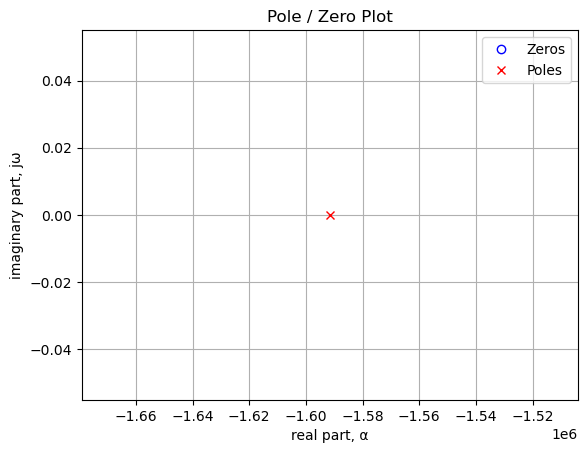

In [37]:
plt.plot(np.real(sys_zeros/(2*np.pi)), np.imag(sys_zeros/(2*np.pi)), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles/(2*np.pi)), np.imag(sys_poles/(2*np.pi)), 'xr')
#plt.xlim((-710,-700))
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The code below generates a table that lists the values of the pole and zero locations. 

In [38]:
table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.4f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.4f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz    Poles, Hz
-----------  ------------
             -1.59155e+06


The circuit above has just one pole in the voltage transfer function.

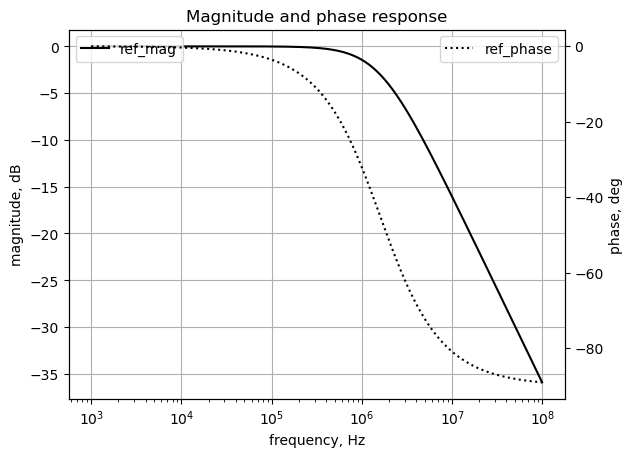

In [39]:
# setup
x_axis = np.logspace(3, 8, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

ref_w, ref_mag, ref_phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(ref_w/(2*np.pi), ref_mag,'-k',label='ref_mag')    # magnitude plot
ax2.semilogx(ref_w/(2*np.pi), ref_phase,':k',label='ref_phase')  # phase plot

#ax1.set_ylim((-40,5))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

As shown above the frequency respose is a low pass filter.

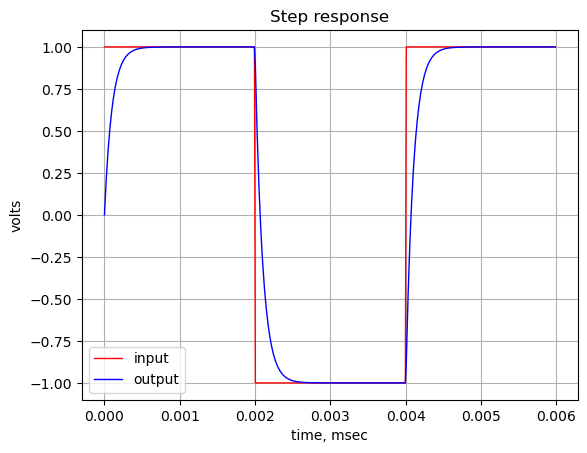

In [40]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, .000006, 500, endpoint=False)
ref_sqr_signal = signal.square(2*np.pi*250000*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
ref_t_step, ref_y_step, ref_x_step = signal.lsim(sys_tf, U=ref_sqr_signal, T=t)

plt.plot(ref_t_step*1e3, ref_sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(ref_t_step*1e3, ref_y_step,'b', linewidth = 1.0, label='output')
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

Review other presentations. Do my claculations make sense?

### Common-Source Amplifier with Bridge T-Coil
In @fig-CS-T-Coil, the FET has been replace by an independednt current source and the componet values are set to one. Later the actual values will be sugstituted into the equations.

![Common source amplifier with a Bridged T-coil circuit model.](CS-T-Coil.png){#fig-CS-T-Coil} 

The circuit was drawn in LTSpice and the exported netlist was copied to the code below. 

In [41]:
CS_T_Coil_net_list = '''
* CS-T-Coil.asc
L1 2 1 1
L2 3 2 1
R 0 3 1
C1 3 1 1
C 2 0 1
I1 0 1 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [42]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(CS_T_Coil_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [43]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$I_{1} = C_{1} s v_{1} - C_{1} s v_{3} - I_{L1}$<br>$0 = C s v_{2} + I_{L1} - I_{L2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{3} \left(C_{1} s + \frac{1}{R}\right)$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{2}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [44]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

The network equations for the circuit in @fig-CS-T-Coil can be solved symbolically and the node voltages and dependent currents using symbolic notation. At this point we can set $L_1=L_2=L$ and then solve for the node voltages.

In [45]:
L = symbols('L')
U_sym = solve(NE_sym.subs({L1:L, L2:L}),X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = \frac{C C_{1} I_{1} L^{2} R s^{4} - C C_{1} I_{1} M^{2} R s^{4} + C I_{1} L^{2} s^{3} + C I_{1} L R s^{2} - C I_{1} M^{2} s^{3} + 2 C_{1} I_{1} L R s^{2} + 2 C_{1} I_{1} M R s^{2} + 2 I_{1} L s + 2 I_{1} M s + I_{1} R}{C C_{1} L^{2} s^{4} + 2 C C_{1} L R s^{3} - C C_{1} M^{2} s^{4} + 2 C C_{1} M R s^{3} + C L s^{2} + C R s + 2 C_{1} L s^{2} + 2 C_{1} M s^{2} + 1}$<br>$v_{2} = \frac{2 C_{1} I_{1} L R s^{2} + 2 C_{1} I_{1} M R s^{2} + I_{1} L s + I_{1} M s + I_{1} R}{C C_{1} L^{2} s^{4} + 2 C C_{1} L R s^{3} - C C_{1} M^{2} s^{4} + 2 C C_{1} M R s^{3} + C L s^{2} + C R s + 2 C_{1} L s^{2} + 2 C_{1} M s^{2} + 1}$<br>$v_{3} = \frac{C C_{1} I_{1} L^{2} R s^{4} - C C_{1} I_{1} M^{2} R s^{4} - C I_{1} M R s^{2} + 2 C_{1} I_{1} L R s^{2} + 2 C_{1} I_{1} M R s^{2} + I_{1} R}{C C_{1} L^{2} s^{4} + 2 C C_{1} L R s^{3} - C C_{1} M^{2} s^{4} + 2 C C_{1} M R s^{3} + C L s^{2} + C R s + 2 C_{1} L s^{2} + 2 C_{1} M s^{2} + 1}$<br>$I_{L1} = \frac{- C C_{1} I_{1} L R s^{3} - C C_{1} I_{1} M R s^{3} - C I_{1} L s^{2} - C I_{1} R s - I_{1}}{C C_{1} L^{2} s^{4} + 2 C C_{1} L R s^{3} - C C_{1} M^{2} s^{4} + 2 C C_{1} M R s^{3} + C L s^{2} + C R s + 2 C_{1} L s^{2} + 2 C_{1} M s^{2} + 1}$<br>$I_{L2} = \frac{C C_{1} I_{1} L R s^{3} + C C_{1} I_{1} M R s^{3} + C I_{1} M s^{2} - I_{1}}{C C_{1} L^{2} s^{4} + 2 C C_{1} L R s^{3} - C C_{1} M^{2} s^{4} + 2 C C_{1} M R s^{3} + C L s^{2} + C R s + 2 C_{1} L s^{2} + 2 C_{1} M s^{2} + 1}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [46]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + L s + M s + R}{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} + C L^{2} s^{3} + C L R s^{2} - C M^{2} s^{3} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + 2 L s + 2 M s + R}$

The numerator is a second order polynomial and the denominator is a fourth order polynomial. Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [47]:
H_sym_num, H_sym_denom = fraction(H_sym)

The numerator polynomial is:

In [48]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num.simplify())))

$N(s)=2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + L s + M s + R$

The coefficients of each Laplace term can be equated to the variables $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^{2}+a_1s+a_0$

where $b_2$, $b_1$ and $b_0$ are:

In [49]:
a2 = H_sym_num.coeff(s**2)
a1 = H_sym_num.coeff(s**1)
a0 = (H_sym_num - a1*s*1 - a2*s**2).expand()

Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=2 C_{1} L R + 2 C_{1} M R$</p><p>$a_1=L + M$</p><p>$a_0=R$</p>

The denominator polynomial is:

In [50]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom.collect(s))))

$D(s)=R + s^{4} \left(C C_{1} L^{2} R - C C_{1} M^{2} R\right) + s^{3} \left(C L^{2} - C M^{2}\right) + s^{2} \left(C L R + 2 C_{1} L R + 2 C_{1} M R\right) + s \left(2 L + 2 M\right)$

The coefficients of each Laplace term can be equated to the variables $b_3$, $b_2$, $b_1$ and $b_0$ in the expression: 

$b_4s^4+b_3s^3+b_2s^2+b_1s+b_0$

where $b_4$, $b_3$, $b_2$, $b_1$ and $b_0$ are:

In [51]:
b4 = H_sym_denom.coeff(s**4)
b3 = H_sym_denom.coeff(s**3)
b2 = H_sym_denom.coeff(s**2)
b1 = H_sym_denom.coeff(s**1)
b0 = (H_sym_denom - b1*s*1 - b2*s**2 - b3*s**3 - b4*s**4).expand()
Markdown('<p>$b_4={:s}$</p><p>$b_3={:s}$</p><p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b4),latex(b3),latex(b2),latex(b1),latex(b0)))

<p>$b_4=C C_{1} L^{2} R - C C_{1} M^{2} R$</p><p>$b_3=C L^{2} - C M^{2}$</p><p>$b_2=C L R + 2 C_{1} L R + 2 C_{1} M R$</p><p>$b_1=2 L + 2 M$</p><p>$b_0=R$</p>

The fourth-order denominator may be expressed as the product of two second-order polynomials, one equal to the the numerator, $N(s)$ and another polynomial, $ps^2+qs+1$. Creating two new SymPy symbols, $p$ and $q$, and multiplying the polynominals $D(s)=N(s)(ps^2+qs+1)$ we get:

In [52]:
p, q = symbols('p q')
Markdown('<p>${:s}$</p>'.format(latex(H_sym_num*(p*s**2+q*s+1))))

<p>$\left(p s^{2} + q s + 1\right) \left(2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + L s + M s + R\right)$</p>

Expanding and collecting the terms of $s$ we get:

In [53]:
A_sym = (H_sym_num*(p*s**2+q*s+1)).expand().collect(s)
Markdown('<p>${:s}$</p>'.format(latex(A_sym)))

<p>$R + s^{4} \cdot \left(2 C_{1} L R p + 2 C_{1} M R p\right) + s^{3} \cdot \left(2 C_{1} L R q + 2 C_{1} M R q + L p + M p\right) + s^{2} \cdot \left(2 C_{1} L R + 2 C_{1} M R + L q + M q + R p\right) + s \left(L + M + R q\right)$</p>

The coefficients of each Laplace term can be equated to the variables $e_3$, $e_2$, $e_1$ and $e_0$ in the expression: 

$e_4s^4+e_3s^3+e_2s^2+e_1s+e_0$

where $e_4$, $e_3$, $e_2$, $e_1$ and $e_0$ are:

In [54]:
e4 = A_sym.coeff(s**4)
e3 = A_sym.coeff(s**3)
e2 = A_sym.coeff(s**2)
e1 = A_sym.coeff(s**1)
e0 = (A_sym - e1*s*1 - e2*s**2 - e3*s**3 - e4*s**4).expand()
Markdown('<p>$e_4={:s}$</p><p>$e_3={:s}$</p><p>$e_2={:s}$</p><p>$e_1={:s}$</p><p>$e_0={:s}$</p>'.format(latex(e4),latex(e3),latex(e2),latex(e1),latex(e0)))

<p>$e_4=2 C_{1} L R p + 2 C_{1} M R p$</p><p>$e_3=2 C_{1} L R q + 2 C_{1} M R q + L p + M p$</p><p>$e_2=2 C_{1} L R + 2 C_{1} M R + L q + M q + R p$</p><p>$e_1=L + M + R q$</p><p>$e_0=R$</p>

The coeficients for each power of $s$ in $D(s)$ and $N(s)(ps^2+qs+1)$ can be equated and we can solve for $p$, $q$. For example, the coeficients for $s^4$ can be equated and written as their difference which equals zero. 

In [55]:
Markdown('<p>${:s}=0$</p>'.format(latex(e4 - b4)))

<p>$- C C_{1} L^{2} R + C C_{1} M^{2} R + 2 C_{1} L R p + 2 C_{1} M R p=0$</p>

We can solve this system of equations:

$e_4 - b_4 = 0$  
$e_3 - b_3 = 0$  
$e_2 - b_2 = 0$  
$e_1 - b_1 = 0$  

There are four equations and five unknowns, $R$, $L$, $C$, $C_1$ and $M$. If SymPy is asked to solve for $p$, $q$, $L$ and $C_1$, it returns multiple possible solutions: 

In [56]:
B_sym = solve([e4-b4, e3-b3, e2-b2, e1-b1], [p,q,L,C1])

temp = ''
for i in B_sym:
    temp += '$(p,q,L,C1)={:s}$<br>'.format(latex(i))

Markdown(temp)

$(p,q,L,C1)=\left( - C M, \  0, \  - M, \  0\right)$<br>$(p,q,L,C1)=\left( - C M, \  0, \  - M, \  C_{1}\right)$<br>$(p,q,L,C1)=\left( C \left(- 2 M - R \sqrt{C M}\right), \  - \sqrt{C M}, \  - M - R \sqrt{C M}, \  0\right)$<br>$(p,q,L,C1)=\left( C \left(- 2 M + R \sqrt{C M}\right), \  \sqrt{C M}, \  - M + R \sqrt{C M}, \  0\right)$<br>$(p,q,L,C1)=\left( \frac{C \left(C R^{2} - 4 M\right)}{4}, \  \frac{C R}{2}, \  \frac{C R^{2}}{2} - M, \  \frac{C}{4} - \frac{M}{R^{2}}\right)$<br>

The variables $L$ and $C_1$ in addition to $p$ and $q$, were chosen to be solved for, since in the numerical example below $R$ and $C$ will be inputs to the design. The last solution provided by SymPy gave non-zero expressions for $p$, $q$, $L$ and $C_1$. So we will use this solution. We can equate the vasriables as follows:

In [57]:
p_sym = B_sym[-1][0]
q_sym = B_sym[-1][1]
L_sym = B_sym[-1][2]
C1_sym = B_sym[-1][3]
Markdown('<p>$p={:s}$</p><p>$q={:s}$</p><p>$L={:s}$</p><p>$C_1={:s}$</p>'.format(latex(p_sym),latex(q_sym),latex(L_sym),latex(C1_sym)))

<p>$p=\frac{C \left(C R^{2} - 4 M\right)}{4}$</p><p>$q=\frac{C R}{2}$</p><p>$L=\frac{C R^{2}}{2} - M$</p><p>$C_1=\frac{C}{4} - \frac{M}{R^{2}}$</p>

Now we can get the new demoninator of the transfer function, which results after the cancellation of the two of the poles with the zeros.

In [58]:
D_new_sym = (p_sym*s**2+q_sym*s+1).simplify().expand().collect(s)
Markdown('<p>$D(s)={:s}$</p>'.format(latex(D_new_sym)))

<p>$D(s)=\frac{C R s}{2} + s^{2} \left(\frac{C^{2} R^{2}}{4} - C M\right) + 1$</p>

The coefficients of the $s$ terms are:

In [59]:
g2 = D_new_sym.coeff(s**2)
g1 = D_new_sym.coeff(s**1)
g0 = (D_new_sym - g1*s*1 - g2*s**2).expand()

Markdown('<p>$g_2={:s}$</p><p>$g_1={:s}$</p><p>$g_0={:s}$</p>'.format(latex(g2),latex(g1),latex(g0)))

<p>$g_2=\frac{C^{2} R^{2}}{4} - C M$</p><p>$g_1=\frac{C R}{2}$</p><p>$g_0=1$</p>

After the cancelation of the two poles with the zeros, we get a two-pole lowpass filter, the transfer function of the filter is:

$H(s)=\frac {\omega_n^2}{s^2+\frac {\omega_n}{Q} s+\omega_n^2}$

For this system, when Q > ⁠1/2⁠ (i.e., when the system is underdamped), it has two complex conjugate poles that each have a real part of −α. That is, the attenuation parameter α represents the rate of exponential decay of the oscillations (that is, of the output after an impulse) into the system. A higher quality factor implies a lower attenuation rate, and so high-Q systems oscillate for many cycles. For example, high-quality bells have an approximately pure sinusoidal tone for a long time after being struck by a hammer. 

Equating the coefficients:

$\omega_n^2=\frac{g_0}{g_2}$

and rearanging the terms:

$\omega_n=\sqrt {\frac{g_0}{g_2}}$

In [60]:
omega_n = sqrt(g0/g2).simplify()
Markdown('The natural frequency, $\omega_n={:s}$'.format(latex(omega_n)))

The natural frequency, $\omega_n=2 \sqrt{\frac{1}{C \left(C R^{2} - 4 M\right)}}$

The coefficinet of the $s$ term is:

$\frac {\omega_n}{Q}=\frac {g_1}{g_2}$

and rearanging the terms, we get the quality factor:

$Q=\frac {g_2 \omega_n}{g_1}$

In [61]:
quality_factor = (g2*omega_n/g1).simplify()
Markdown('The quality factor, $Q={:s}$'.format(latex(quality_factor)))

The quality factor, $Q=\frac{\sqrt{\frac{1}{C \left(C R^{2} - 4 M\right)}} \left(C R^{2} - 4 M\right)}{R}$

- A system with low quality factor (Q < ⁠1/2⁠) is said to be overdamped. Such a system doesn't oscillate at all, but when displaced from its equilibrium steady-state output it returns to it by exponential decay, approaching the steady state value asymptotically. It has an impulse response that is the sum of two decaying exponential functions with different rates of decay. As the quality factor decreases the slower decay mode becomes stronger relative to the faster mode and dominates the system's response resulting in a slower system. A second-order low-pass filter with a very low quality factor has a nearly first-order step response; the system's output responds to a step input by slowly rising toward an asymptote.
- A system with high quality factor (Q > ⁠1/2⁠) is said to be underdamped. Underdamped systems combine oscillation at a specific frequency with a decay of the amplitude of the signal. Underdamped systems with a low quality factor (a little above Q = ⁠1/2⁠) may oscillate only once or a few times before dying out. As the quality factor increases, the relative amount of damping decreases. A high-quality bell rings with a single pure tone for a very long time after being struck. A purely oscillatory system, such as a bell that rings forever, has an infinite quality factor. More generally, the output of a second-order low-pass filter with a very high quality factor responds to a step input by quickly rising above, oscillating around, and eventually converging to a steady-state value.
- A system with an intermediate quality factor (Q = ⁠1/2⁠) is said to be critically damped. Like an overdamped system, the output does not oscillate, and does not overshoot its steady-state output (i.e., it approaches a steady-state asymptote). Like an underdamped response, the output of such a system responds quickly to a unit step input. Critical damping results in the fastest response (approach to the final value) possible without overshoot. Real system specifications usually allow some overshoot for a faster initial response or require a slower initial response to provide a safety margin against overshoot.

The damping ratio is given by $\zeta$ which is:

$\zeta=\frac {1}{2Q}$

In [62]:
zeta = (1/(2*quality_factor)).simplify()
Markdown('The damping ratio, $\zeta={:s}$'.format(latex(zeta)))

The damping ratio, $\zeta=\frac{R}{2 \sqrt{\frac{1}{C \left(C R^{2} - 4 M\right)}} \left(C R^{2} - 4 M\right)}$

At this point we can substitute in some numerical values. A $\zeta = \sqrt{0.5}$ is used in the design since this will give the maximum rise time and minimal overshoot in the transient response. 

For $\zeta = \sqrt{0.5}$, $R=1000$ and $C=100pF$, solve for $M$.

In [63]:
Cn = 100e-12
Rn = 1000
Mn = solve(zeta.subs({C:Cn, R:Rn})-sqrt(1/2), M)[0]
#Mn = solve(zeta.subs({L:Ln, C:Cn, R:Rn})-1, M)[0]
Markdown('M={:.3e}'.format(Mn))

M=1.250e-5

Now the other values can be solved for.

In [64]:
C1n=C1_sym.subs({C:Cn, R:Rn, M:Mn})
Ln=L_sym.subs({C:Cn,M:Mn,R:Rn})

Markdown('<p>$C_1={:.3e}$</p><p>$L={:.3e}$</p>'.format(C1n,Ln))

<p>$C_1=1.250e-11$</p><p>$L=3.750e-5$</p>

The coupling coefficient, $k=\frac{M}{\sqrt{L_1L_2}}$, is:

In [65]:
K = Mn/sqrt(Ln*Ln)
Markdown('K={:.3f}'.format(K))

K=0.333

Save these component values for 2 port analysis below.

In [66]:
Two_port_B_analysis = dict({L:Ln, C:Cn, C1:C1n, R:Rn, M:Mn})

Making the substitutions, we get a numerical transfer function.

In [67]:
H = H_sym.subs({L:Ln, C:Cn, C1:C1n, R:Rn, M:Mn})
Markdown('<p>$H(s)={:s}$</p>'.format(latex(H)))

<p>$H(s)=\frac{1.25 \cdot 10^{-12} s^{2} + 5.0 \cdot 10^{-5} s + 1000}{1.5625 \cdot 10^{-27} s^{4} + 1.25 \cdot 10^{-19} s^{3} + 5.0 \cdot 10^{-12} s^{2} + 0.0001 s + 1000}$</p>

After converting $H(s)$ to NumPy, we can plot and display the poles, zeros, frequency response and step response.

In [68]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easily be obtained with the following code:

In [69]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted on the complex frequency plane with the following code:

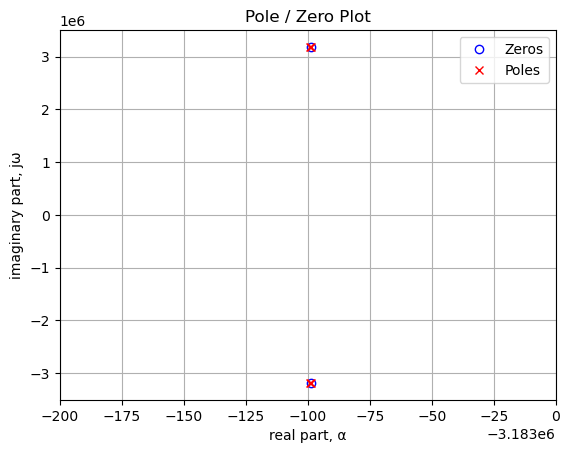

In [70]:
plt.plot(np.real(sys_zeros/(2*np.pi)), np.imag(sys_zeros/(2*np.pi)), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles/(2*np.pi)), np.imag(sys_poles/(2*np.pi)), 'xr')
plt.xlim((-3183200,-3183000))
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The code below generates a table that lists the values of the pole and zero locations. 

In [71]:
table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.4f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.4f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz                    Poles, Hz
---------------------------  ---------------------------
-3183098.8618+3183098.8618j  -3183098.9409+3183098.9136j
-3183098.8618-3183098.8618j  -3183098.9409-3183098.9136j
                             -3183098.7827+3183098.8101j
                             -3183098.7827-3183098.8101j


As shown above, the two zeros are slightly different than two of the poles, but close enough to effectivaly cancel. Also note that all the poles and zerso end up a the same frequency.

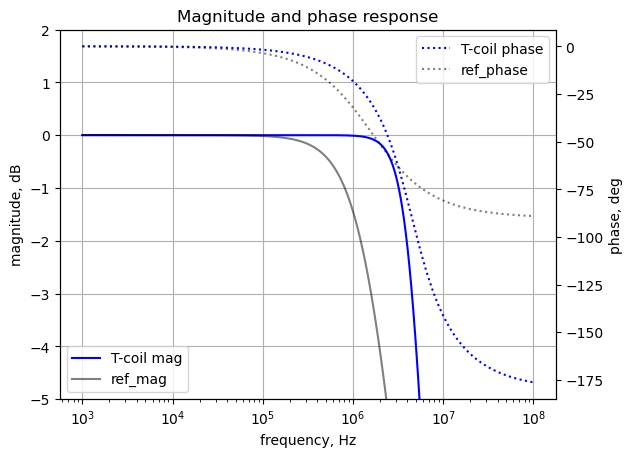

In [72]:
# setup
x_axis = np.logspace(3, 8, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), mag,'-b',label='T-coil mag')    # magnitude plot
ax2.semilogx(w/(2*np.pi), phase,':b',label='T-coil phase')  # phase plot

ax1.semilogx(ref_w/(2*np.pi), ref_mag,'-k',alpha=0.5, label='ref_mag')    # magnitude plot
ax2.semilogx(ref_w/(2*np.pi), ref_phase,':k',alpha=0.5, label='ref_phase')  # phase plot

ax1.set_ylim((-5,2))

# position legends
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The plot above shows the frequency responce for the refernce amplifier along with the T-coil, in blue. As you can see, the T-coil amplifier has a greater bandwidth. 

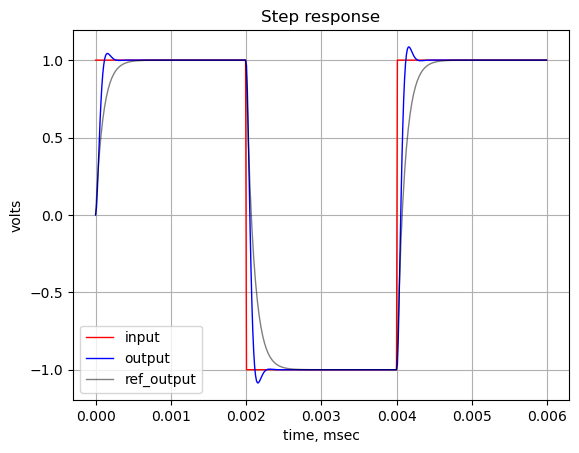

In [73]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, .000006, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*250000*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')

#plt.plot(ref_t_step*1e3, ref_sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(ref_t_step*1e3, ref_y_step,'k',  alpha = 0.5, linewidth = 1.0, label='ref_output')

plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Constant Input Impedance (Constant-R Networks)

Move this discussion down to 2-port analysis


Bridged T-coils can be designed to maintain a nearly constant input impedance over a wide frequency range. This is very important for impedance matching, preventing signal reflections, and allowing for cascading of multiple circuits without degradation.

Look at T-Coil basic, what is $Z_{in}(s)$ versus R? 

This is probably the same topic as Capacitive Load but looking at impedance vs bandwith  

See /home/jeff32/Documents/Solving Electrical Engineering Problems with Python Blog/MNA Problem Circuits/T-Coil/T-Coil references/Wang Algebra From Theory to Practice.pdf
for Constant R notes. Also history of BTC and math behind the design.

@Ross2022

```
@ARTICLE{Ross2022,
  author={Ross, Bob and Ling, Cong},
  journal={IEEE Open Journal of Circuits and Systems}, 
  title={Wang Algebra: From Theory to Practice}, 
  year={2022},
  volume={3},
  number={},
  pages={274-285},
  keywords={Algebra;Bandwidth;Graph theory;Transfer functions;Symmetric matrices;Mathematical models;Impedance;Bandwidth extension;bridged-T networks;matrix determinant;peaking;T-coil;Wang algebra;wideband amplifier},
  doi={10.1109/OJCAS.2022.3217065}
}
```

**Wang Algebra**

Wang algebra is a commutative algebra with the defining properties:
1.  $x+x = 0$
2.  $x \cdot x = 0$

It was introduced by Ki-Tung Wang in a 1934 paper as a simplified method for analyzing electrical networks. In essence, it is a clever way to compute the determinant of a symmetric matrix, which was a common but tedious task in electrical engineering before computers. The properties of Wang algebra allow many terms in a calculation to vanish, significantly reducing the complexity of the process.

The algebra was later formalized and popularized by mathematicians Raoul Bott and Richard Duffin in 1950, who recognized it as a specific form of Grassmann algebra over the finite field modulo 2.

Today, Wang algebra has found applications in:
* **Electrical engineering**: It is used in the design of electronic circuits, including T-coils and integrated circuits.
* **Graph theory**: The formulation is useful for problems involving graphs, such as generating the spanning trees of a graph.
* **Enzyme kinetics**: It has been used to systematically generate King-Altman directed graph patterns for deriving rate equations.

**Ki-Tung Wang**

Ki-Tung Wang (王季同, 1875-1954) was a Chinese researcher and engineer. He was born into a prominent family in Suzhou, Jiangsu Province. He received his education at the Imperial Tungwen College and worked in Britain, where he published a paper in English.

In 1928, he was appointed Research Fellow at the National Research Institute of Engineering, Academia Sinica. It was in this role that he developed and published his "new method of analysis of electrical networks," which became known as Wang algebra.

Wang's method was initially published in a Chinese journal, and it was some years later that it was introduced to the wider mathematical community. While some sources have suggested he could not write in English, historical records show he had published in English earlier in his career. It is possible that for his 1934 paper, he may have needed help with the English translation.





## Electrostatic Discharge (ESD) Protection
T-coils are also used in Electrostatic Discharge (ESD) protection circuits, as they can effectively match the impedance of ESD devices over a broad band. The schematic shown in @fig-t-coil_tvs is representative of a Bridge T-coil with a [Transient Voltage Suppressor](https://en.wikipedia.org/wiki/Transient-voltage-suppression_diode) (TVS) diode, $U_1$. A TVS diode is a type of diode specifically designed to protect electronic circuits from damaging voltage spikes. Think of it as an electronic "safety valve." When a sudden high-voltage event occures, the TVS diode "clamps" the voltage, diverting the excess current away from the sensitive components to ground. This process happens extremely fast, often in picoseconds, making them ideal for protecting against quick, powerful transients like those caused by lightning strikes, electrostatic discharge (ESD), or the switching of inductive loads. Once the transient has passed and the voltage returns to normal, the diode automatically reverts to its high-impedance, non-conducting state. Most TVS diodes have appear as a capacitive element in the circuit during the off state. In @fig-t-coil_tvs, $U_1$ can be modeled as a capacitor. The off state capacitace varies widely from less than a 1 pF to 25 pF depending on the specifications of the TVS diode.  

![T-Coil-TVS schematic.](T-Coil-TVS_v1.png){#fig-t-coil_tvs}  

In the circuit above, $V_1$ is the source voltage to the network, which could also be suseptable to voltage transients, but the off state capacitance of $U_1$ would limit the bandwidth, if it was used without the Bridge T-coil. The componet values have been set to one in the schematic, since these will be calculated in the code that follows. @fig-t-coil_tvs was drawn in LTSpice and the netlist was copied into the code. $U_1$ has been replace by $C$ in the netlist.





```
@ARTICLE{1253881,
  author={Galal, S. and Razavi, B.},
  journal={IEEE Journal of Solid-State Circuits}, 
  title={Broadband ESD protection circuits in CMOS technology}, 
  year={2003},
  volume={38},
  number={12},
  pages={2334-2340},
  keywords={CMOS technology;Electrostatic discharge;Protection;Impedance matching;Parasitic capacitance;Bandwidth;Data communication;Microprocessors;Circuit simulation;Prototypes},
  doi={10.1109/JSSC.2003.818568}
}
```

In [154]:
T_Coil_TVS_net_list = '''
* T-Coil-TVS_v1.asc
V1 1 0 1
L1 4 3 1
L2 2 4 1
C1 2 3 1
R2 2 0 1
C 4 0 1
R1 3 1 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [155]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_TVS_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [156]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}}$<br>$0 = - C_{1} s v_{3} + I_{L2} + v_{2} \left(C_{1} s + \frac{1}{R_{2}}\right)$<br>$0 = - C_{1} s v_{2} - I_{L1} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$<br>$0 = C s v_{4} + I_{L1} - I_{L2}$<br>$V_{1} = v_{1}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{3} + v_{4}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s + v_{2} - v_{4}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [157]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

The network equations for the circuit in @fig-t-coil_tvs can be solved symbolically and the node voltages and dependent currents using symbolic notation. 

In [158]:
U_sym = solve(NE_sym,X)

temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C C_{1} L_{1} L_{2} R_{2} V_{1} s^{4} - C C_{1} M^{2} R_{2} V_{1} s^{4} - C M R_{2} V_{1} s^{2} + C_{1} L_{1} R_{2} V_{1} s^{2} + C_{1} L_{2} R_{2} V_{1} s^{2} + 2 C_{1} M R_{2} V_{1} s^{2} + R_{2} V_{1}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$<br>$v_{3} = \frac{C C_{1} L_{1} L_{2} R_{2} V_{1} s^{4} - C C_{1} M^{2} R_{2} V_{1} s^{4} + C L_{1} L_{2} V_{1} s^{3} + C L_{1} R_{2} V_{1} s^{2} - C M^{2} V_{1} s^{3} + C_{1} L_{1} R_{2} V_{1} s^{2} + C_{1} L_{2} R_{2} V_{1} s^{2} + 2 C_{1} M R_{2} V_{1} s^{2} + L_{1} V_{1} s + L_{2} V_{1} s + 2 M V_{1} s + R_{2} V_{1}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$<br>$v_{4} = \frac{C_{1} L_{1} R_{2} V_{1} s^{2} + C_{1} L_{2} R_{2} V_{1} s^{2} + 2 C_{1} M R_{2} V_{1} s^{2} + L_{2} V_{1} s + M V_{1} s + R_{2} V_{1}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$<br>$I_{V1} = \frac{- C C_{1} L_{1} L_{2} V_{1} s^{4} - C C_{1} L_{1} R_{2} V_{1} s^{3} - C C_{1} L_{2} R_{2} V_{1} s^{3} + C C_{1} M^{2} V_{1} s^{4} - 2 C C_{1} M R_{2} V_{1} s^{3} - C L_{2} V_{1} s^{2} - C R_{2} V_{1} s - C_{1} L_{1} V_{1} s^{2} - C_{1} L_{2} V_{1} s^{2} - 2 C_{1} M V_{1} s^{2} - V_{1}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$<br>$I_{L1} = \frac{- C C_{1} L_{2} R_{2} V_{1} s^{3} - C C_{1} M R_{2} V_{1} s^{3} - C L_{2} V_{1} s^{2} - C R_{2} V_{1} s - V_{1}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$<br>$I_{L2} = \frac{C C_{1} L_{1} R_{2} V_{1} s^{3} + C C_{1} M R_{2} V_{1} s^{3} + C M V_{1} s^{2} - V_{1}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [159]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C C_{1} L_{1} L_{2} R_{2} s^{4} - C C_{1} M^{2} R_{2} s^{4} - C M R_{2} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{2} s^{2} + R_{2}}{C C_{1} L_{1} L_{2} R_{1} s^{4} + C C_{1} L_{1} L_{2} R_{2} s^{4} + C C_{1} L_{1} R_{1} R_{2} s^{3} + C C_{1} L_{2} R_{1} R_{2} s^{3} - C C_{1} M^{2} R_{1} s^{4} - C C_{1} M^{2} R_{2} s^{4} + 2 C C_{1} M R_{1} R_{2} s^{3} + C L_{1} L_{2} s^{3} + C L_{1} R_{2} s^{2} + C L_{2} R_{1} s^{2} - C M^{2} s^{3} + C R_{1} R_{2} s + C_{1} L_{1} R_{1} s^{2} + C_{1} L_{1} R_{2} s^{2} + C_{1} L_{2} R_{1} s^{2} + C_{1} L_{2} R_{2} s^{2} + 2 C_{1} M R_{1} s^{2} + 2 C_{1} M R_{2} s^{2} + L_{1} s + L_{2} s + 2 M s + R_{1} + R_{2}}$

Both numerator and the denominator are a fourth order polynomials.

Making some substitutions, $L_1=L_2=L$ and $R=R_1=R_2$.

In [160]:
L, R = symbols('L R')
H_sym = H_sym.subs({L1:L,L2:L,R1:R,R2:R})
#H_sym = H_sym.subs({L1:L,L2:L,C:50e-12,R:50})
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C C_{1} L^{2} R s^{4} - C C_{1} M^{2} R s^{4} - C M R s^{2} + 2 C_{1} L R s^{2} + 2 C_{1} M R s^{2} + R}{2 C C_{1} L^{2} R s^{4} + 2 C C_{1} L R^{2} s^{3} - 2 C C_{1} M^{2} R s^{4} + 2 C C_{1} M R^{2} s^{3} + C L^{2} s^{3} + 2 C L R s^{2} - C M^{2} s^{3} + C R^{2} s + 4 C_{1} L R s^{2} + 4 C_{1} M R s^{2} + 2 L s + 2 M s + 2 R}$

For $\zeta = \sqrt{0.5}$, $R=50$ and $C=10pF$, solve for $M$.

In [161]:
Cn = 10e-12
Rn = 50
Mn = solve(zeta.subs({C:Cn, R:Rn})-sqrt(1/2), M)[0]
#Mn = solve(zeta.subs({L:Ln, C:Cn, R:Rn})-1, M)[0]
Markdown('M={:.3e}'.format(Mn))

M=3.125e-9

Now the other values can be solved for.

In [162]:
C1n=C1_sym.subs({C:Cn, R:Rn, M:Mn})
Ln=L_sym.subs({C:Cn,M:Mn,R:Rn})

Markdown('<p>$C_1={:.3e}$</p><p>$L={:.3e}$</p>'.format(C1n,Ln))

<p>$C_1=1.250e-12$</p><p>$L=9.375e-9$</p>

The coupling coefficient, $k=\frac{M}{\sqrt{L_1L_2}}$, is:

In [163]:
K = Mn/sqrt(Ln*Ln)
Markdown('K={:.3f}'.format(K))

K=0.333

Save these component values for 2 port analysis below.

In [164]:
Two_port_A_analysis = dict({L:Ln, C:Cn, C1:C1n, R:Rn, M:Mn})

Making the substitutions, we get a numerical transfer function.

In [165]:
H = H_sym.subs({L:Ln, C:Cn, C1:C1n, R:Rn, M:Mn})
Markdown('<p>$H(s)={:s}$</p>'.format(latex(H)))

<p>$H(s)=\frac{4.88281249999999 \cdot 10^{-38} s^{4} - 3.00926553810506 \cdot 10^{-33} s^{2} + 50}{9.76562499999998 \cdot 10^{-38} s^{4} + 1.5625 \cdot 10^{-27} s^{3} + 1.25 \cdot 10^{-17} s^{2} + 5.0 \cdot 10^{-8} s + 100}$</p>

After converting $H(s)$ to NumPy, we can plot and display the poles, zeros, frequency response and step response.

In [166]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

The poles and zeros of the transfer function can easily be obtained with the following code:

In [167]:
sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

The poles and zeros of the transfer function are plotted on the complex frequency plane with the following code:

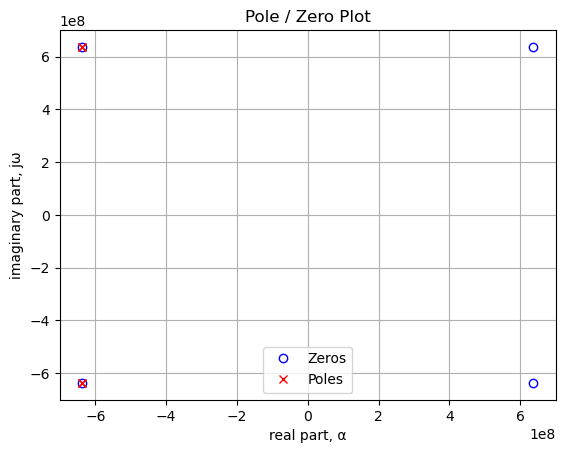

In [168]:
plt.plot(np.real(sys_zeros/(2*np.pi)), np.imag(sys_zeros/(2*np.pi)), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles/(2*np.pi)), np.imag(sys_poles/(2*np.pi)), 'xr')
#plt.xlim((-3183200,-3183000))
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

The code below generates a table that lists the values of the pole and zero locations. 

In [169]:
table_header = ['Zeros, Hz', 'Poles, Hz']
num_table_rows = max(len(sys_zeros),len(sys_poles))
table_row = []

for i in range(num_table_rows):
    if i < len(sys_zeros):
        z = '{:.4f}'.format(sys_zeros[i]/(2*np.pi))
    else:
        z = ''
    if i < len(sys_poles):
        p = '{:.4f}'.format(sys_poles[i]/(2*np.pi))
    else:
        p = ''
    table_row.append([z,p])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Zeros, Hz                        Poles, Hz
-------------------------------  -------------------------------
-636619772.3676+636619772.3676j  -636619764.7544+636619799.0619j
-636619772.3676-636619772.3676j  -636619764.7544-636619799.0619j
636619772.3676+636619772.3676j   -636619779.9808+636619745.6733j
636619772.3676-636619772.3676j   -636619779.9808-636619745.6733j


Comments ...   
Include some comments about the Poles and zeros all being at the same location. Can two of the poles be moved to a different location?  

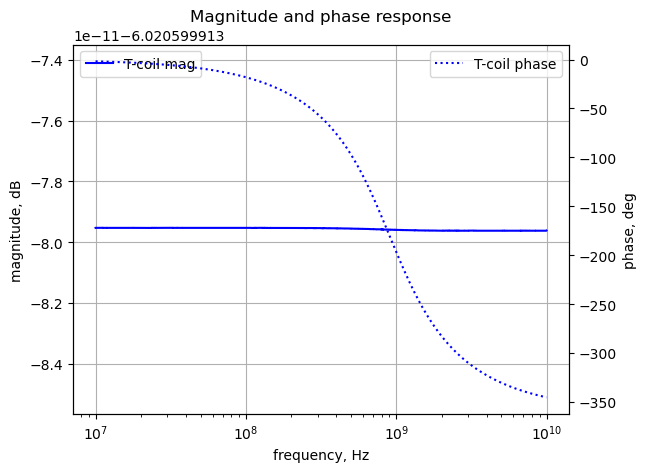

In [170]:
# setup
x_axis = np.logspace(7, 10, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), mag,'-b',label='T-coil mag')    # magnitude plot
ax2.semilogx(w/(2*np.pi), phase,':b',label='T-coil phase')  # phase plot

#ax1.set_ylim((-5,2))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

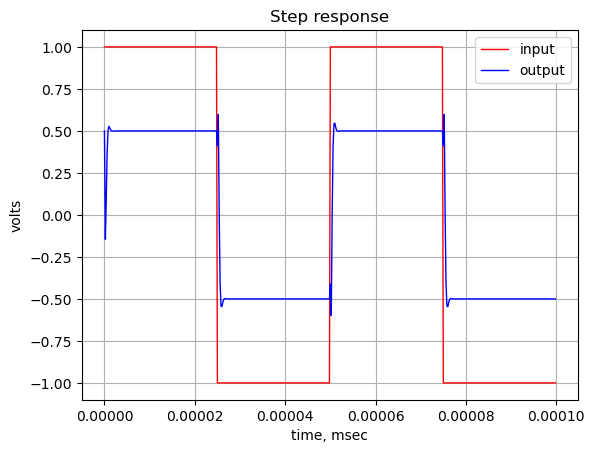

In [171]:
# define the time interval and create a square wave step waveform.
t = np.linspace(0, 1e-7, 500, endpoint=False)
sqr_signal = signal.square(2*np.pi*20e6*t, duty=0.5) #/20+1/20

# call lsim to generate the response signal
t_step, y_step, x_step = signal.lsim(sys_tf, U=sqr_signal, T=t)

plt.plot(t_step*1e3, sqr_signal, 'r', alpha = 1.0, linewidth=1, label='input')
plt.plot(t_step*1e3, y_step,'b', linewidth = 1.0, label='output')

plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()
plt.legend(loc='best')
# show plot
plt.show()

## Two Port Analysis, Circuit A

![T-Coil-2-port, circuit A](T-Coil-2-port_A.png){#fig-t-coil-2-port_A.png} 

Comments ...

In [92]:
T_Coil_2_port_B_net_list = '''
* T-Coil-2-port_B.asc
V1 1 0 1
L1 3 1 1
L2 2 3 1
C1 2 1 1
V2 2 0 1
C2 3 0 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [93]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_2_port_B_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [94]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{2} - I_{L1} + I_{V1}$<br>$0 = - C_{1} s v_{1} + C_{1} s v_{2} + I_{L2} + I_{V2}$<br>$0 = C_{2} s v_{3} + I_{L1} - I_{L2}$<br>$V_{1} = v_{1}$<br>$V_{2} = v_{2}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{3}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s + v_{2} - v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [95]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

**Symbolic solution**  


In [96]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [97]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = V_{2}$<br>$v_{3} = \frac{L_{1} V_{2} + L_{2} V_{1} + M V_{1} + M V_{2}}{C_{2} L_{1} L_{2} s^{2} - C_{2} M^{2} s^{2} + L_{1} + L_{2} + 2 M}$<br>$I_{V1} = \frac{- C_{1} C_{2} L_{1} L_{2} V_{1} s^{4} + C_{1} C_{2} L_{1} L_{2} V_{2} s^{4} + C_{1} C_{2} M^{2} V_{1} s^{4} - C_{1} C_{2} M^{2} V_{2} s^{4} - C_{1} L_{1} V_{1} s^{2} + C_{1} L_{1} V_{2} s^{2} - C_{1} L_{2} V_{1} s^{2} + C_{1} L_{2} V_{2} s^{2} - 2 C_{1} M V_{1} s^{2} + 2 C_{1} M V_{2} s^{2} - C_{2} L_{2} V_{1} s^{2} - C_{2} M V_{2} s^{2} - V_{1} + V_{2}}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$<br>$I_{V2} = \frac{C_{1} C_{2} L_{1} L_{2} V_{1} s^{4} - C_{1} C_{2} L_{1} L_{2} V_{2} s^{4} - C_{1} C_{2} M^{2} V_{1} s^{4} + C_{1} C_{2} M^{2} V_{2} s^{4} + C_{1} L_{1} V_{1} s^{2} - C_{1} L_{1} V_{2} s^{2} + C_{1} L_{2} V_{1} s^{2} - C_{1} L_{2} V_{2} s^{2} + 2 C_{1} M V_{1} s^{2} - 2 C_{1} M V_{2} s^{2} - C_{2} L_{1} V_{2} s^{2} - C_{2} M V_{1} s^{2} + V_{1} - V_{2}}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$<br>$I_{L1} = \frac{- C_{2} L_{2} V_{1} s^{2} - C_{2} M V_{2} s^{2} - V_{1} + V_{2}}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$<br>$I_{L2} = \frac{C_{2} L_{1} V_{2} s^{2} + C_{2} M V_{1} s^{2} - V_{1} + V_{2}}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$<br>

Seems easier to calculate the Y paramters since all that is needed is to set the other ports to 0.

In [98]:
y11_sym = (U_sym[I_V1]/U_sym[v1]).subs({V2:0}).cancel()
Markdown('$y11(s)={:s}$'.format(latex(y11_sym)))

$y11(s)=\frac{- C_{1} C_{2} L_{1} L_{2} s^{4} + C_{1} C_{2} M^{2} s^{4} - C_{1} L_{1} s^{2} - C_{1} L_{2} s^{2} - 2 C_{1} M s^{2} - C_{2} L_{2} s^{2} - 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$

In [99]:
y12_sym = (U_sym[I_V1]/U_sym[v2]).subs({V1:0}).cancel()
Markdown('$y12(s)={:s}$'.format(latex(y12_sym)))

$y12(s)=\frac{C_{1} C_{2} L_{1} L_{2} s^{4} - C_{1} C_{2} M^{2} s^{4} + C_{1} L_{1} s^{2} + C_{1} L_{2} s^{2} + 2 C_{1} M s^{2} - C_{2} M s^{2} + 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$

In [100]:
y22_sym = (U_sym[I_V2]/U_sym[v2]).subs({V1:0}).cancel()
Markdown('$y22(s)={:s}$'.format(latex(y22_sym)))

$y22(s)=\frac{- C_{1} C_{2} L_{1} L_{2} s^{4} + C_{1} C_{2} M^{2} s^{4} - C_{1} L_{1} s^{2} - C_{1} L_{2} s^{2} - 2 C_{1} M s^{2} - C_{2} L_{1} s^{2} - 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$

In [101]:
y21_sym = (U_sym[I_V2]/U_sym[v1]).subs({V2:0}).cancel()
Markdown('$y23(s)={:s}$'.format(latex(y22_sym)))

$y23(s)=\frac{- C_{1} C_{2} L_{1} L_{2} s^{4} + C_{1} C_{2} M^{2} s^{4} - C_{1} L_{1} s^{2} - C_{1} L_{2} s^{2} - 2 C_{1} M s^{2} - C_{2} L_{1} s^{2} - 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}$

In [102]:
Y_sym = Matrix([[y11_sym,y21_sym],[y12_sym,y22_sym]])
Markdown('$Y(s)={:s}$'.format(latex(Y_sym)))

$Y(s)=\left[\begin{matrix}\frac{- C_{1} C_{2} L_{1} L_{2} s^{4} + C_{1} C_{2} M^{2} s^{4} - C_{1} L_{1} s^{2} - C_{1} L_{2} s^{2} - 2 C_{1} M s^{2} - C_{2} L_{2} s^{2} - 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s} & \frac{C_{1} C_{2} L_{1} L_{2} s^{4} - C_{1} C_{2} M^{2} s^{4} + C_{1} L_{1} s^{2} + C_{1} L_{2} s^{2} + 2 C_{1} M s^{2} - C_{2} M s^{2} + 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}\\\frac{C_{1} C_{2} L_{1} L_{2} s^{4} - C_{1} C_{2} M^{2} s^{4} + C_{1} L_{1} s^{2} + C_{1} L_{2} s^{2} + 2 C_{1} M s^{2} - C_{2} M s^{2} + 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s} & \frac{- C_{1} C_{2} L_{1} L_{2} s^{4} + C_{1} C_{2} M^{2} s^{4} - C_{1} L_{1} s^{2} - C_{1} L_{2} s^{2} - 2 C_{1} M s^{2} - C_{2} L_{1} s^{2} - 1}{C_{2} L_{1} L_{2} s^{3} - C_{2} M^{2} s^{3} + L_{1} s + L_{2} s + 2 M s}\end{matrix}\right]$

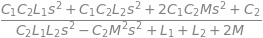

In [103]:
Y_sym.det()

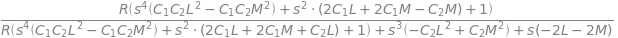

In [104]:
L, R = symbols('L R')
Kv = (-y21_sym*R)/(1+y22_sym*R)
Kv.subs({L1:L,L2:L}).simplify().collect(s)

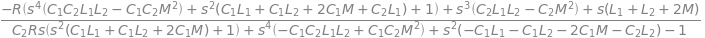

In [105]:
Zin = (1+y22_sym*R)/(y11_sym+Y_sym.det()*R)
Zin.simplify().collect(s)

In [106]:
Two_port_A_analysis

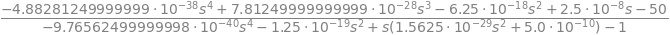

In [107]:
#L = symbols('L')
Z1 = (Zin.subs({L1:L,L2:L,C2:C}).subs(Two_port_A_analysis)).simplify()
Z1

In [108]:
Z1_f = lambdify(s, Z1)

Plot Z versus $j\omega$

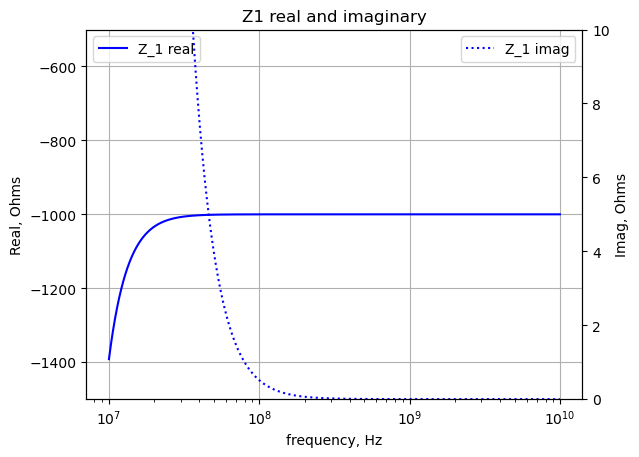

In [181]:
# setup
x_axis = np.logspace(3, 8, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('Real, Ohms')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('Imag, Ohms',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), Z1_f(1j*w).real,'-b',label='Z_1 real')    # magnitude plot
ax2.semilogx(w/(2*np.pi), Z1_f(1j*w).imag,':b',label='Z_1 imag')  # phase plot

ax1.set_ylim((-1500,-500))
ax2.set_ylim((0,10))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Z1 real and imaginary')
plt.show()

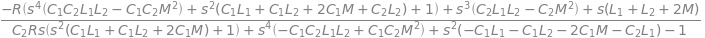

In [110]:
Zout = (1+y11_sym*R)/(y22_sym+Y_sym.det()*R)
Zout.simplify().collect(s)

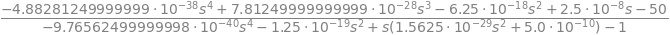

In [111]:
Z2 = (Zout.subs({L1:L,L2:L,C2:C}).subs(Two_port_A_analysis)).simplify()
Z2

In [112]:
Z2_f = lambdify(s, Z2)

Plot Z versus $j\omega$

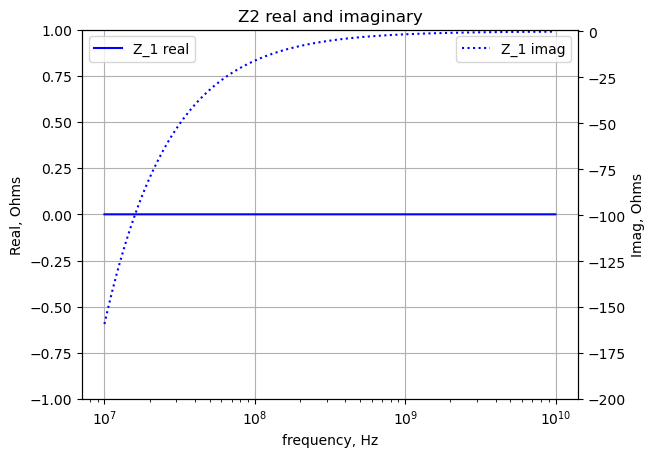

In [183]:
# setup
x_axis = np.logspace(3, 8, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('Real, Ohms')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('Imag, Ohms',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), Z2_f(1j*w).real,'-b',label='Z_1 real')    # magnitude plot
ax2.semilogx(w/(2*np.pi), Z2_f(1j*w).imag,':b',label='Z_1 imag')  # phase plot

ax1.set_ylim((-1,1))
ax2.set_ylim((-200,1))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Z2 real and imaginary')
plt.show()

## Two Port Analysis, Circuit B

![T-Coil-2-port, circuit B](T-Coil-2-port_B.png){#fig-t-coil-2-port_B} 

Comments ...

In [114]:
T_Coil_2_port_B_net_list = '''
* T-Coil-2-port_B.asc
V1 1 0 1
L1 2 1 1
L2 3 2 1
C1 3 1 1
V2 2 0 1
R 3 0 1
K L1 L2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [115]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(T_Coil_2_port_B_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [116]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{1} s v_{1} - C_{1} s v_{3} - I_{L1} + I_{V1}$<br>$0 = I_{L1} - I_{L2} + I_{V2}$<br>$0 = - C_{1} s v_{1} + I_{L2} + v_{3} \left(C_{1} s + \frac{1}{R}\right)$<br>$V_{1} = v_{1}$<br>$V_{2} = v_{2}$<br>$0 = - I_{L1} L_{1} s - I_{L2} M s - v_{1} + v_{2}$<br>$0 = - I_{L1} M s - I_{L2} L_{2} s - v_{2} + v_{3}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [117]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

**Symbolic solution**  


In [118]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [119]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = V_{2}$<br>$v_{3} = \frac{C_{1} L_{1} L_{2} R V_{1} s^{2} - C_{1} M^{2} R V_{1} s^{2} + L_{1} R V_{2} - M R V_{1} + M R V_{2}}{C_{1} L_{1} L_{2} R s^{2} - C_{1} M^{2} R s^{2} + L_{1} L_{2} s + L_{1} R - M^{2} s}$<br>$I_{V1} = \frac{- C_{1} L_{1} L_{2} V_{1} s^{3} - C_{1} L_{1} R V_{1} s^{2} + C_{1} L_{1} R V_{2} s^{2} - C_{1} L_{2} R V_{1} s^{2} + C_{1} L_{2} R V_{2} s^{2} + C_{1} M^{2} V_{1} s^{3} - 2 C_{1} M R V_{1} s^{2} + 2 C_{1} M R V_{2} s^{2} - L_{2} V_{1} s + L_{2} V_{2} s + M V_{2} s - R V_{1} + R V_{2}}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$<br>$I_{V2} = \frac{C_{1} L_{1} R V_{1} s^{2} - C_{1} L_{1} R V_{2} s^{2} + C_{1} L_{2} R V_{1} s^{2} - C_{1} L_{2} R V_{2} s^{2} + 2 C_{1} M R V_{1} s^{2} - 2 C_{1} M R V_{2} s^{2} - L_{1} V_{2} s + L_{2} V_{1} s - L_{2} V_{2} s + M V_{1} s - 2 M V_{2} s + R V_{1} - R V_{2}}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$<br>$I_{L1} = \frac{- C_{1} L_{2} R V_{1} s^{2} + C_{1} L_{2} R V_{2} s^{2} - C_{1} M R V_{1} s^{2} + C_{1} M R V_{2} s^{2} - L_{2} V_{1} s + L_{2} V_{2} s + M V_{2} s - R V_{1} + R V_{2}}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$<br>$I_{L2} = \frac{C_{1} L_{1} R V_{1} s - C_{1} L_{1} R V_{2} s + C_{1} M R V_{1} s - C_{1} M R V_{2} s - L_{1} V_{2} + M V_{1} - M V_{2}}{C_{1} L_{1} L_{2} R s^{2} - C_{1} M^{2} R s^{2} + L_{1} L_{2} s + L_{1} R - M^{2} s}$<br>

Seems easier to calculate the Y paramters since all that is needed is to set the other ports to 0.

In [120]:
y11_sym = (U_sym[I_V1]/U_sym[v1]).subs({V2:0}).cancel()
Markdown('$y11(s)={:s}$'.format(latex(y11_sym)))

$y11(s)=\frac{- C_{1} L_{1} L_{2} s^{3} - C_{1} L_{1} R s^{2} - C_{1} L_{2} R s^{2} + C_{1} M^{2} s^{3} - 2 C_{1} M R s^{2} - L_{2} s - R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$

In [121]:
y12_sym = (U_sym[I_V1]/U_sym[v2]).subs({V1:0}).cancel()
Markdown('$y12(s)={:s}$'.format(latex(y12_sym)))

$y12(s)=\frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$

In [122]:
y22_sym = (U_sym[I_V2]/U_sym[v2]).subs({V1:0}).cancel()
Markdown('$y22(s)={:s}$'.format(latex(y22_sym)))

$y22(s)=\frac{- C_{1} L_{1} R s^{2} - C_{1} L_{2} R s^{2} - 2 C_{1} M R s^{2} - L_{1} s - L_{2} s - 2 M s - R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$

In [123]:
y21_sym = (U_sym[I_V2]/U_sym[v1]).subs({V2:0}).cancel()
Markdown('$y23(s)={:s}$'.format(latex(y22_sym)))

$y23(s)=\frac{- C_{1} L_{1} R s^{2} - C_{1} L_{2} R s^{2} - 2 C_{1} M R s^{2} - L_{1} s - L_{2} s - 2 M s - R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}$

In [124]:
Y_sym = Matrix([[y11_sym,y21_sym],[y12_sym,y22_sym]])
Markdown('$Y(s)={:s}$'.format(latex(Y_sym)))

$Y(s)=\left[\begin{matrix}\frac{- C_{1} L_{1} L_{2} s^{3} - C_{1} L_{1} R s^{2} - C_{1} L_{2} R s^{2} + C_{1} M^{2} s^{3} - 2 C_{1} M R s^{2} - L_{2} s - R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}} & \frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}\\\frac{C_{1} L_{1} R s^{2} + C_{1} L_{2} R s^{2} + 2 C_{1} M R s^{2} + L_{2} s + M s + R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}} & \frac{- C_{1} L_{1} R s^{2} - C_{1} L_{2} R s^{2} - 2 C_{1} M R s^{2} - L_{1} s - L_{2} s - 2 M s - R}{C_{1} L_{1} L_{2} R s^{3} - C_{1} M^{2} R s^{3} + L_{1} L_{2} s^{2} + L_{1} R s - M^{2} s^{2}}\end{matrix}\right]$

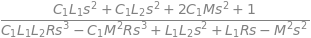

In [125]:
Y_sym.det()

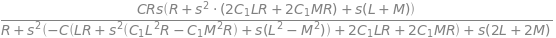

In [126]:
L, C = symbols('L C')
Kv = (-y21_sym*R)/(1+y22_sym*1/(s*C))
Kv.subs({L1:L,L2:L}).simplify().collect(s)

## $Z_{in}$

$Z_{in}=\frac {1+y_{22}*Z_L}{y_{11}+\Delta_yZ_L}$


$Z_L=\frac {1}{sC}$

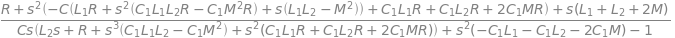

In [127]:
Zin = (1+y22_sym*1/(s*C))/(y11_sym+Y_sym.det()*1/(s*C))
Zin.simplify().collect(s)

In [128]:
Two_port_B_analysis

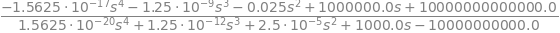

In [129]:
Z1 = (Zin.subs({L1:L,L2:L,C2:C}).subs(Two_port_B_analysis)).simplify()
Z1

In [130]:
Z1_f = lambdify(s, Z1)

Plot Z versus $j\omega$

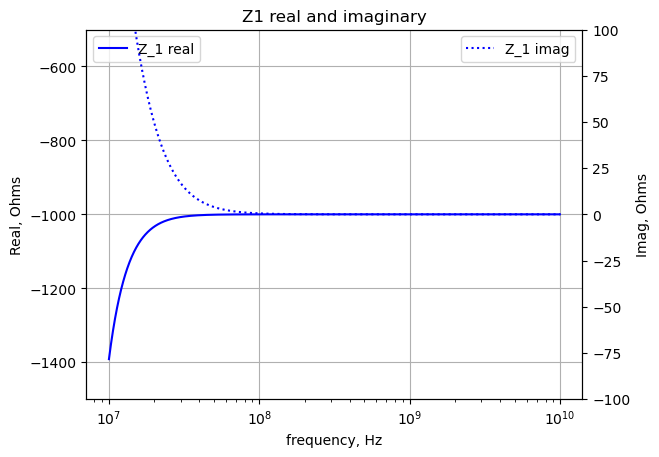

In [189]:
# setup
x_axis = np.logspace(3, 8, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('Real, Ohms')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('Imag, Ohms',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), Z1_f(1j*w).real,'-b',label='Z_1 real')    # magnitude plot
ax2.semilogx(w/(2*np.pi), Z1_f(1j*w).imag,':b',label='Z_1 imag')  # phase plot

ax1.set_ylim((-1500,-500))
ax2.set_ylim((-100,100))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Z1 real and imaginary')
plt.show()

## $Z_{out}$

$Z_{out}=\frac {1+y_{11}*Z_s}{y_{22}+\Delta_yZ_s}$


$Z_s=50$

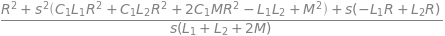

In [132]:
Zout = (1+y11_sym*R)/(y22_sym+Y_sym.det()*R)
Zout.simplify().collect(s)

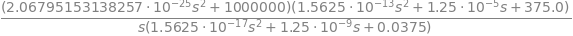

In [133]:
Z2 = (Zout.subs({L1:L,L2:L,C2:C}).subs(Two_port_B_analysis)).simplify()
Z2

In [134]:
Z2_f = lambdify(s, Z2)

Plot Z versus $j\omega$

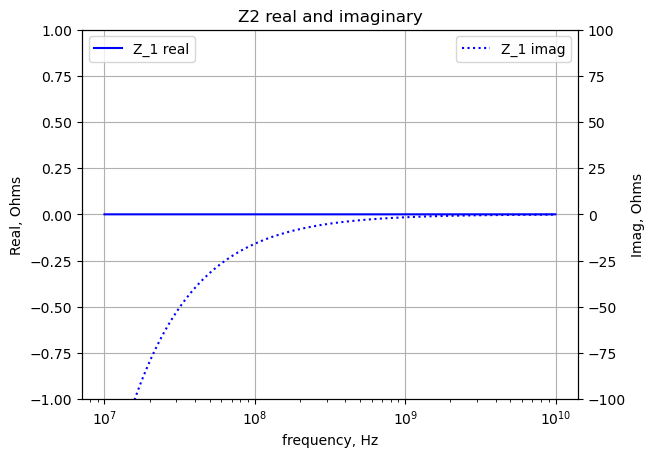

In [187]:
# setup
x_axis = np.logspace(3, 8, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('Real, Ohms')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('Imag, Ohms',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), Z2_f(1j*w).real,'-b',label='Z_1 real')    # magnitude plot
ax2.semilogx(w/(2*np.pi), Z2_f(1j*w).imag,':b',label='Z_1 imag')  # phase plot

ax1.set_ylim((-1,1))
ax2.set_ylim((-100,100))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Z2 real and imaginary')
plt.show()

## Summary

- Discription and motivation for looking at the Bridged T-Coil
- Design calculations
- Comments on prior analysis methods
- kind of reminds me of a circuilator
- future work
  - explore the n=4 Bridged T butterworth filter
  - complex Z in place of $C_{LOAD}$
  - asymetric Bridge T-Coil
  - antenna matching with a Bridge T-Coil or other complex loads